![alttext](https://github.com/UrbsLab/STREAMLINE/blob/main/Pictures/STREAMLINE_LOGO.jpg?raw=true)

STREAMLINE is an end-to-end automated machine learning (AutoML) pipeline that empowers anyone to easily run, interpret, and apply a rigorous and customizable analysis for data mining or predictive modeling.

--------------

This notebook runs all aspects of the STREAMLINE which is an automated machine learning analysis pipeline for binary classification tasks. Of note, two potentially important elements that are not automated by this pipeline include careful data cleaning and feature engineering using problem domain knowledge. Please review the README included in the associated GitHub repository for a detailed about this pipeline.

This notebook is set up to run 'as-is' on a 'demo' dataset from the UCI repository (HCC dataset) using only three modeling algorithms (so that it runs in a matter of minutes). We analyze a copy of the dataset with and without covariate features to show how this pipline can be run on multiple datasets simultaneously (having the option to compare modeling on these different datasets in a later phase of the pipeline. Users will need to upload their own files and update pipeline run parameters below to ready the pipeline for their own needs. Suggested default run parameters suitible for most users are included, however file paths and names will need to be edited to run anything other than the 'demo' analysis.



# Setup

## Prerequisites and STREAMLINE
For a local run prerequisites should already be set up and the notebook should be in the root folder of streamline. 

In [1]:
# !pip install -r requirements.txt

In [2]:
# !pip install --upgrade scipy>=1.8.0

## Notebook Housekeeping
Set up notebook cells to display internal process. 

Use logging.INFO for higher level output, logging.WARNING for only critical information. Comment to hide all text output.

You can use run_parallel=True for phases other than modeling, but the advantage is not significant vs the overhead for small jobs.

In [3]:
import logging
FORMAT = '%(levelname)s: %(message)s'
logging.basicConfig(format=FORMAT)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# STREAMLINE Workflow

## Mandatory Run Parameters for Pipeline

Preset for running the demonstration dataset, change accordingly for running on custom dataset.

In [4]:
data_path = "./DemoData" 
output_path = './demo/'
experiment_name = 'hcc_demo'  
class_label = 'Class' 
instance_label = 'InstanceID'

Housekeeping code for error reduction and functionality.

In [5]:
import os
import shutil
if os.path.exists(output_path):
    shutil.rmtree(output_path)

Uncomment and run the below cell to easily upload csv files and set up custom dataset:

In [6]:
# !mkdir -p mycustomfolder
# %cd mycustomfolder
# CUSTOM = True
# from google.colab import files
# uploaded = files.upload()
# %cd ..
# class_label = input("Enter Class Label Header")
# instance_label = eval(input("Enter Instance Label Header or None"))

## Phase 1: Exploratory Analysis

In [7]:
from streamline.runners.eda_runner import EDARunner
eda = EDARunner(data_path, output_path, experiment_name, class_label=class_label, instance_label=instance_label, 
                n_splits=3, random_state=42)
eda.run(run_parallel=False)

INFO: NumExpr defaulting to 8 threads.
INFO: Loading Dataset: demodata
INFO: Loading Dataset: demodata
INFO: Identifying Feature Types...
INFO: Running Basic Exploratory Analysis...
INFO: Data Counts: ----------------
INFO: Instance Count = 165
INFO: Feature Count = 49
INFO:     Categorical  = 27
INFO:     Quantitative = 22
INFO: Missing Count = 826
INFO:     Missing Percent = 0.10216450216450217
INFO: Class Counts: ----------------
INFO: Class Count Information0    102
1     63
Name: Class, dtype: int64
INFO: Generating Feature Correlation Heatmap...
INFO: Running Univariate Analyses...
INFO: Plotting top significant 20 features.
INFO: ###################################################
INFO: Significant Univariate Associations:
INFO: Performance Status*: (p-val = 3.2548676278782114e-05)
INFO: Symptoms : (p-val = 0.0006092985105592953)
INFO: Liver Metastasis: (p-val = 0.002993588224869906)
INFO: Ascites degree*: (p-val = 0.0038134308539161175)
INFO: Portal Vein Thrombosis: (p-val = 0.

## Phase 2: Data Preprocessing

In [8]:
from streamline.runners.dataprocess_runner import DataProcessRunner
dpr = DataProcessRunner(output_path, experiment_name, class_label=class_label, instance_label=instance_label, 
                        random_state=42)
dpr.run(run_parallel=False)

INFO: Preparing Train and Test for: hcc-data_example_no_covariates_CV_1
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc-data_example_no_covariates Phase 2 complete
INFO: Preparing Train and Test for: hcc-data_example_no_covariates_CV_0
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc-data_example_no_covariates Phase 2 complete
INFO: Preparing Train and Test for: hcc-data_example_no_covariates_CV_2
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc-data_example_no_covariates Phase 2 complete
INFO: Preparing Train and Test for: demodata_CV_2
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: demodata Phase 2 complete
INFO: Preparing Train and Test for: demodata_CV_0
INFO: Imputing Missing Values...
INFO: Scaling Data Values

## Phase 3: Feature Importance Evaluation

In [9]:
from streamline.runners.feature_runner import FeatureImportanceRunner
f_imp = FeatureImportanceRunner(output_path, experiment_name, class_label=class_label, instance_label=instance_label,
                                random_state=42)
f_imp.run(run_parallel=False)

INFO: Loading Dataset: hcc-data_example_no_covariates_CV_1_Train
INFO: Prepared Train and Test for: hcc-data_example_no_covariates_CV_1
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc-data_example_no_covariates CV1 phase 3 mutual_information evaluation complete
INFO: Loading Dataset: hcc-data_example_no_covariates_CV_0_Train
INFO: Prepared Train and Test for: hcc-data_example_no_covariates_CV_0
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc-data_example_no_covariates CV0 phase 3 mutual_information evaluation complete
INFO: Loading Dataset: hcc-data_example_no_covariates_CV_2_Train
INFO: Prepared Train and Test for: hcc-data_example_no_covariates_CV_2
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc-data_example_no_covariates CV2 phase 3 mutual_information evaluation complete
INFO: Loading Dataset: hcc-data_example_no_covariates_CV_1_Train
IN

## Phase 4: Feature Selection

In [10]:
from streamline.runners.feature_runner import FeatureSelectionRunner
f_sel = FeatureSelectionRunner(output_path, experiment_name, algorithms=["MI", "MS"],
                               class_label=class_label, instance_label=instance_label, random_state=42)
f_sel.run(run_parallel=False)

INFO: Plotting Feature Importance Scores...
INFO:                            Feature  Importance
28       Alpha-Fetoprotein (ng/mL)    0.123251
24             Performance Status*    0.098954
44                            Iron    0.084515
38      Alkaline phosphatase (U/L)    0.076429
33                 Albumin (mg/dL)    0.074789
46                Ferritin (ng/mL)    0.069531
29              Haemoglobin (g/dL)    0.067689
42  Major dimension of nodule (cm)    0.061938
11                 Hemochromatosis    0.035557
5       Hepatitis C Virus Antibody    0.033404
INFO: Saved Feature Importance Plots at
INFO: ./demo//hcc_demo/hcc-data_example_no_covariates/feature_selection/mutual_information/TopAverageScores.png
INFO:                              Feature  Importance
38        Alkaline phosphatase (U/L)    0.099398
29                Haemoglobin (g/dL)    0.095180
24               Performance Status*    0.077934
20                  Liver Metastasis    0.073571
37  Gamma glutamyl transferase

## Phase 5: Modeling

In [11]:
# Machine Learning Algorithms to Run, can be change by the user.
algorithms = ["NB", "LR", "DT"]

In [12]:
from streamline.runners.model_runner import ModelExperimentRunner
model_exp = ModelExperimentRunner(output_path, experiment_name, algorithms, 
                                  class_label=class_label, instance_label=instance_label,
                                  save_plots=True)
model_exp.run(run_parallel=True)

100%|███████████████████████████████████████████| 18/18 [00:11<00:00,  1.63it/s]


## Phase 5 (Optional/Advanced): Feeding Custom Models

In [13]:
#@title Custom Model Example

from abc import ABC
from streamline.modeling.basemodel import BaseModel
from sklearn.linear_model import SGDClassifier as SGD


class ElasticNetClassifier(BaseModel, ABC):
    model_name = "Elastic Net"
    small_name = "EN"
    color = "aquamarine"

    def __init__(self, cv_folds=3, scoring_metric='balanced_accuracy',
                 metric_direction='maximize', random_state=None, cv=None, n_jobs=None):
        super().__init__(SGD, "Elastic Net", cv_folds, scoring_metric, metric_direction, random_state, cv)
        self.param_grid = {'penalty': ['elasticnet'], 'loss': ['log_loss', 'modified_huber'], 'alpha': [0.04, 0.05],
                           'max_iter': [1000, 2000], 'l1_ratio': [0.001, 0.1], 'class_weight': [None, 'balanced'],
                           'random_state': [random_state, ]}
        self.small_name = "EN"
        self.color = "aquamarine"
        self.n_jobs = n_jobs

    def objective(self, trial, params=None):
        self.params = {'penalty': trial.suggest_categorical('penalty', self.param_grid['penalty']),
                       'loss': trial.suggest_categorical('loss', self.param_grid['loss']),
                       'alpha': trial.suggest_float('alpha', self.param_grid['alpha'][0],
                                                    self.param_grid['l1_ratio'][1]),
                       'max_iter': trial.suggest_int('max_iter', self.param_grid['max_iter'][0],
                                                     self.param_grid['max_iter'][1]),
                       'l1_ratio': trial.suggest_float('l1_ratio', self.param_grid['l1_ratio'][0],
                                                       self.param_grid['l1_ratio'][1]),
                       'class_weight': trial.suggest_categorical('class_weight', self.param_grid['class_weight']),
                       'random_state': trial.suggest_categorical('random_state', self.param_grid['random_state'])}

        mean_cv_score = self.hyper_eval()
        return mean_cv_score

In [14]:
import time
import optuna
from streamline.modeling.modeljob import ModelJob
from streamline.models.decision_tree import DecisionTreeClassifier

model = ElasticNetClassifier()
start = time.time()
n_splits = 3

logging.warning("Running " + model.small_name + " Model Optimization")

optuna.logging.set_verbosity(optuna.logging.WARNING)
for i in range(n_splits):
    model_job = ModelJob(output_path + '/' + experiment_name + '/demodata', output_path, experiment_name, i,
                         class_label=class_label, instance_label=instance_label)
    model_job.run(model)
    logging.warning("Best Params:" + str(model.params))
logging.warning(model.small_name + " Optimization Step, Time running" + "" + ": " + str(time.time() - start))

INFO: Running EN on ./demo//hcc_demo/demodata/CVDatasets/demodata_CV_0_Train.csv
INFO: Best trial:
INFO:   Value: 0.8052418595896856
INFO:   Params: 
INFO:     penalty: elasticnet
INFO:     loss: modified_huber
INFO:     alpha: 0.04218360634997377
INFO:     max_iter: 1492
INFO:     l1_ratio: 0.028059801732393665
INFO:     class_weight: balanced
INFO:     random_state: None
INFO: demodata [CV_0] (EN) training complete. ------------------------------------
INFO: Running EN on ./demo//hcc_demo/demodata/CVDatasets/demodata_CV_1_Train.csv
INFO: Best trial:
INFO:   Value: 0.7950781102955017
INFO:   Params: 
INFO:     penalty: elasticnet
INFO:     loss: modified_huber
INFO:     alpha: 0.09124439417484471
INFO:     max_iter: 1565
INFO:     l1_ratio: 0.09443392672153815
INFO:     class_weight: balanced
INFO:     random_state: None
INFO: demodata [CV_1] (EN) training complete. ------------------------------------
INFO: Running EN on ./demo//hcc_demo/demodata/CVDatasets/demodata_CV_2_Train.csv
IN

## Phase 6: Statistics Summary and Figure Generation

INFO: Running Statistics Summary for hcc-data_example_no_covariates
INFO: Running stats on Naive Bayes


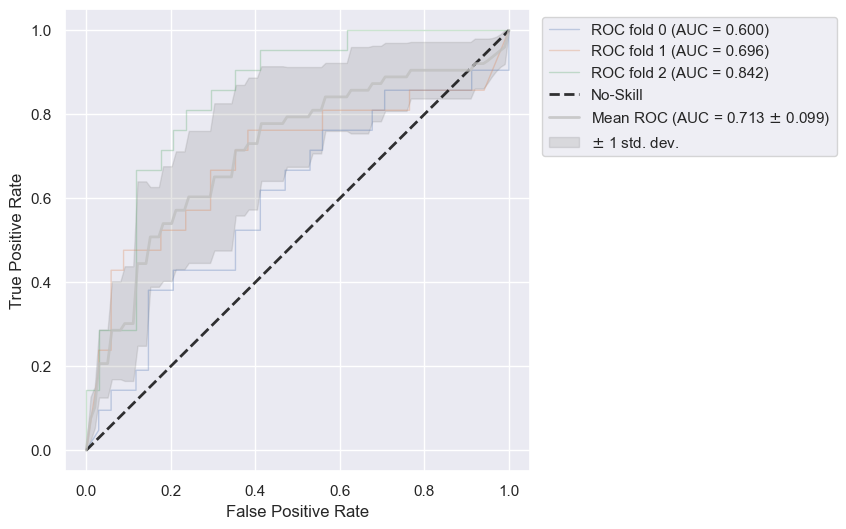

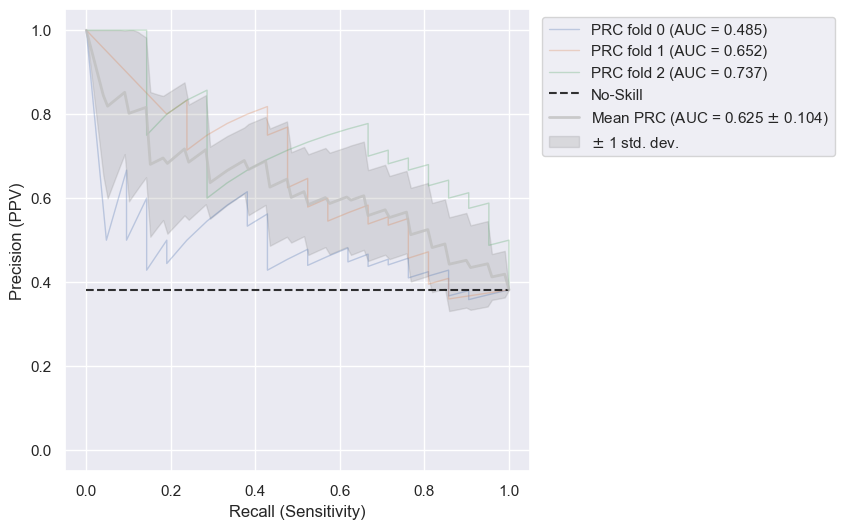

INFO: Running stats on Logistic Regression


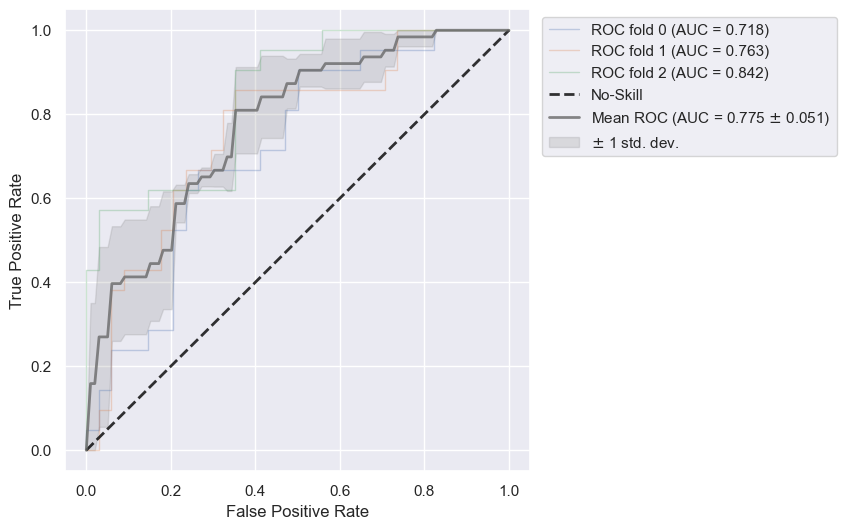

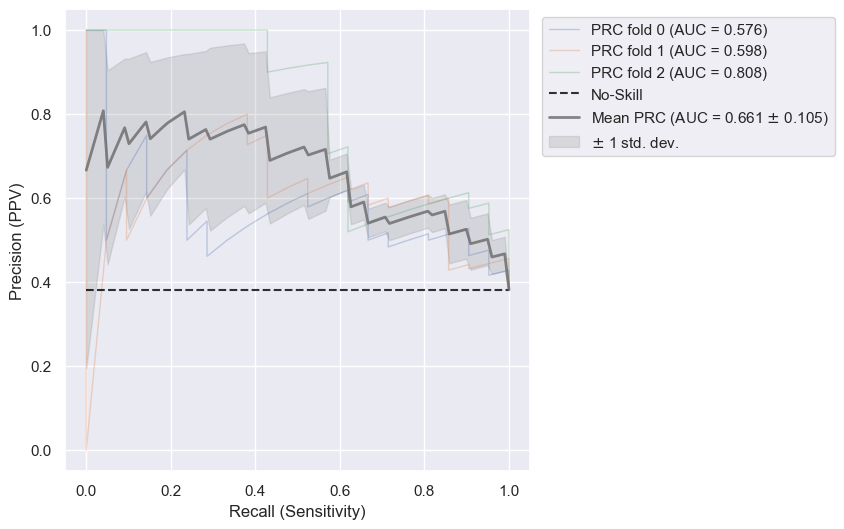

INFO: Running stats on Decision Tree


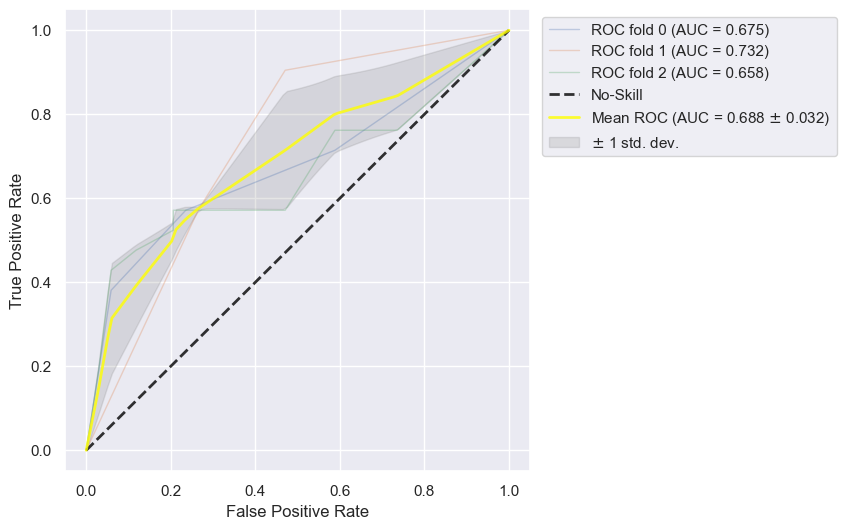

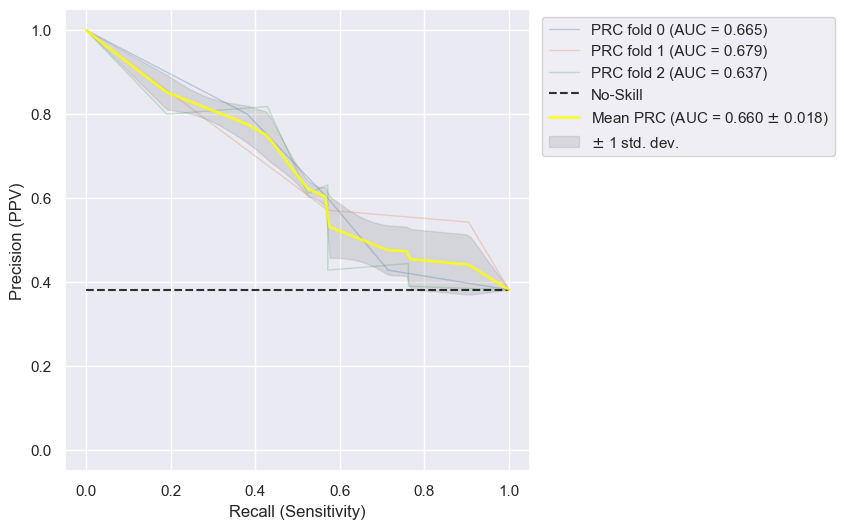

INFO: Generating ROC and PRC plots...


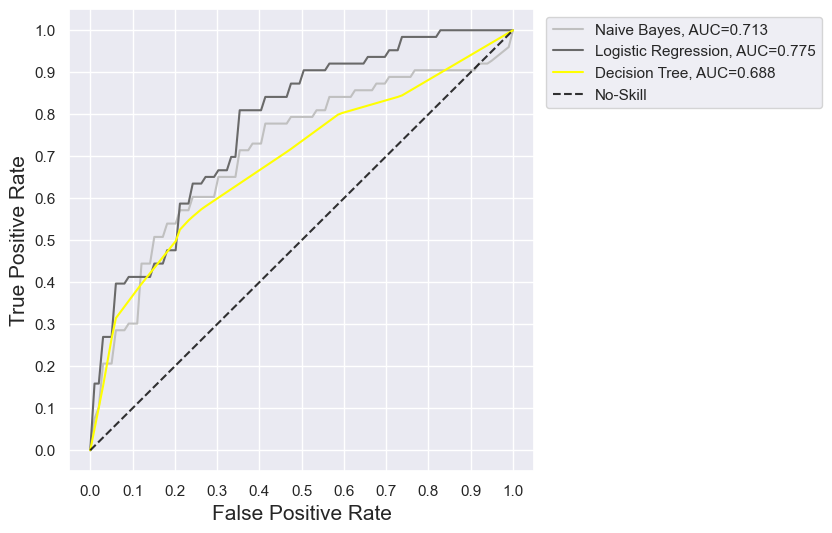

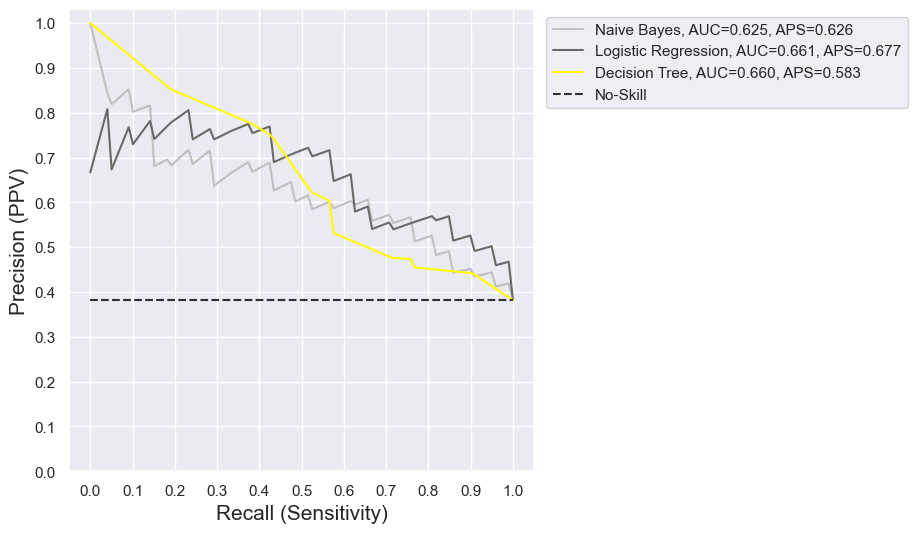

INFO: Saving Metric Summaries...
INFO: Generating Metric Boxplots...


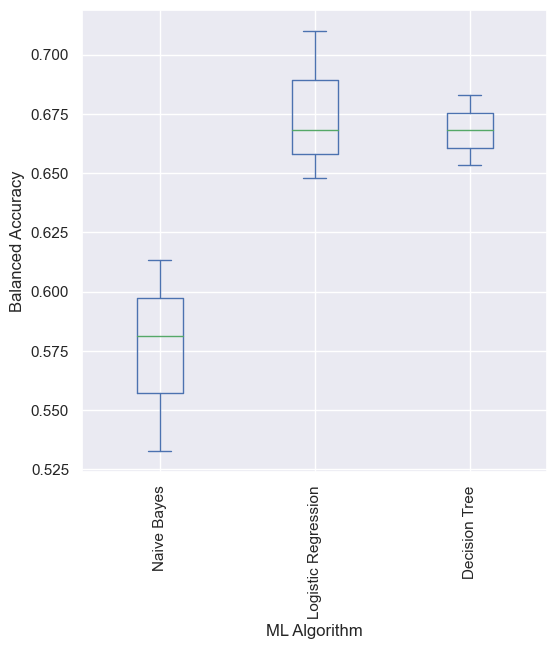

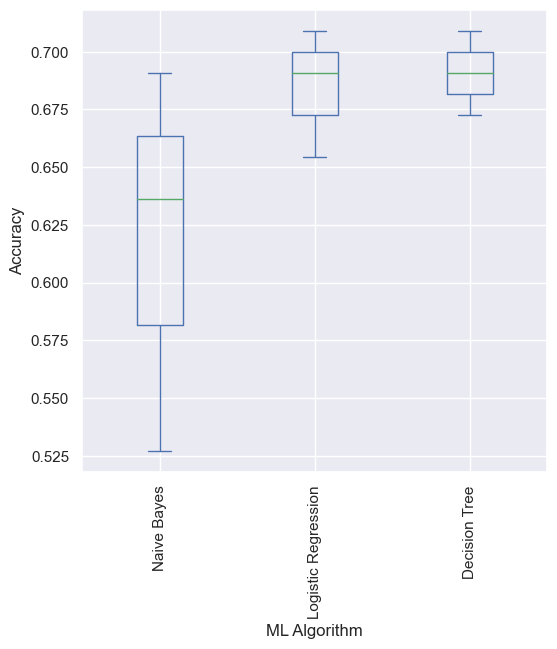

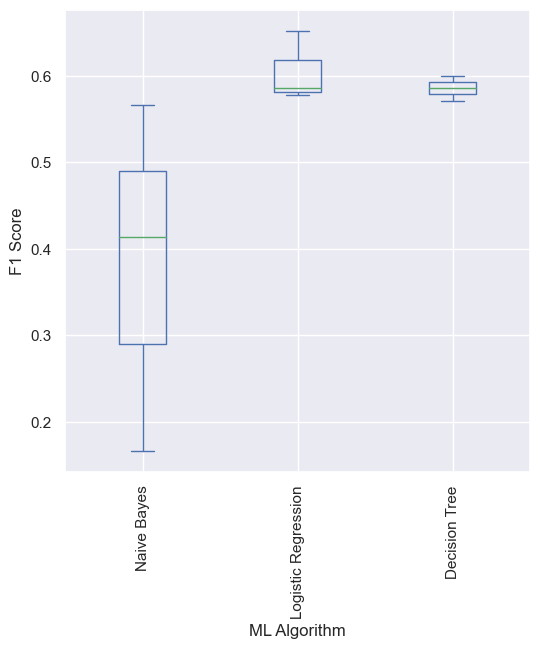

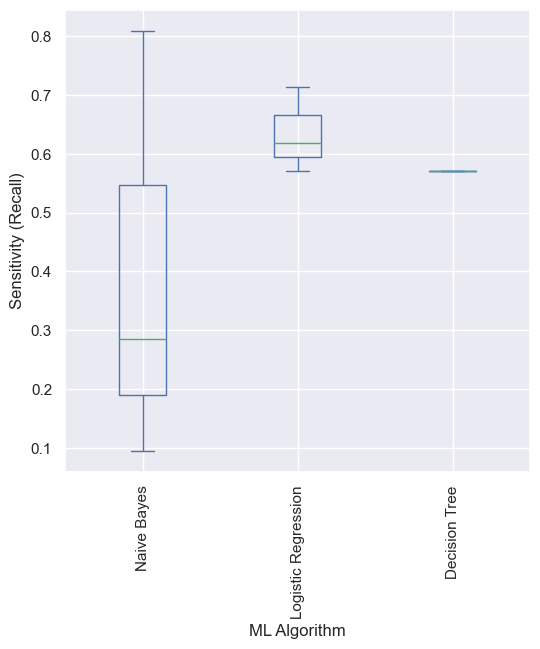

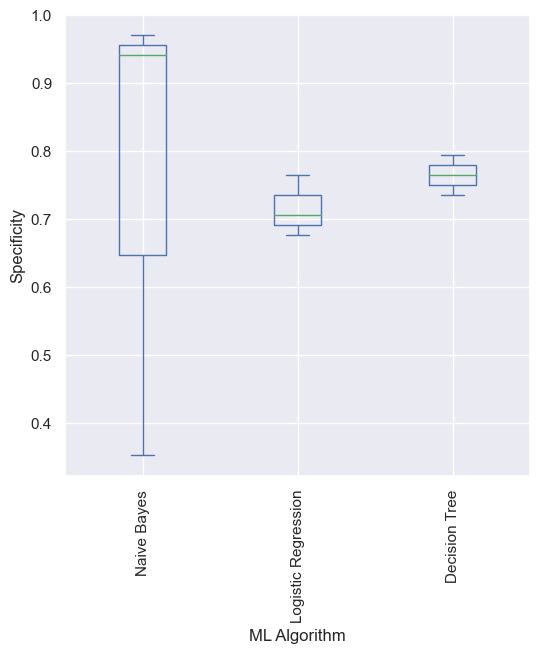

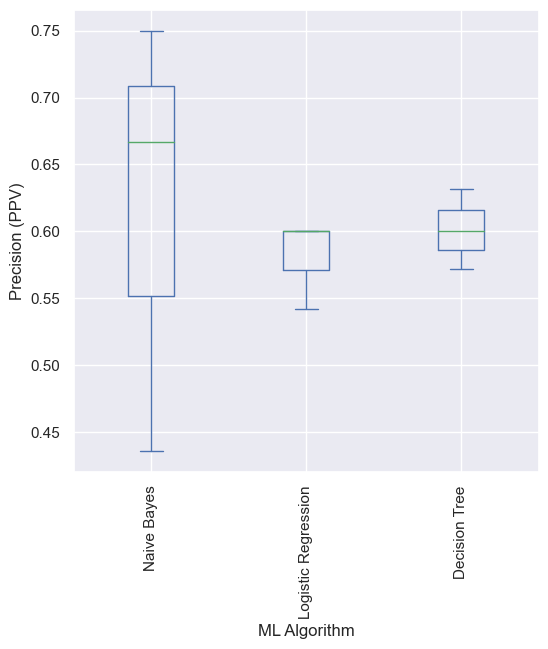

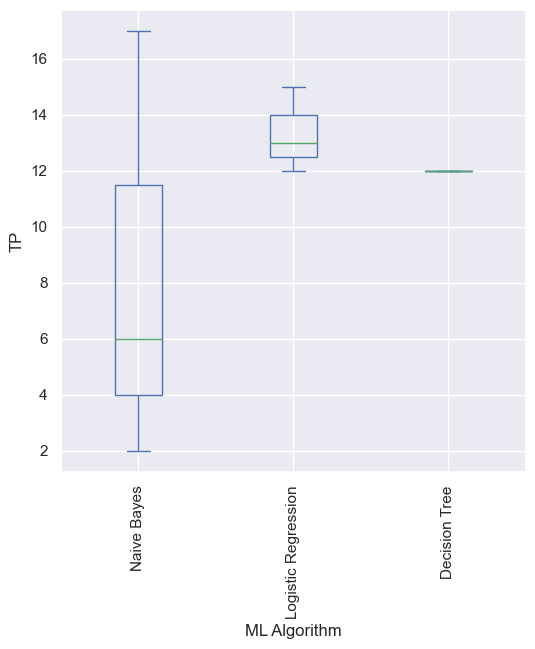

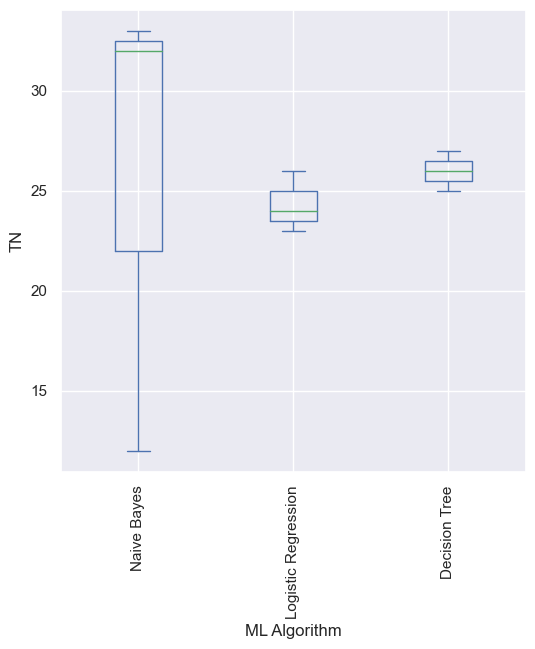

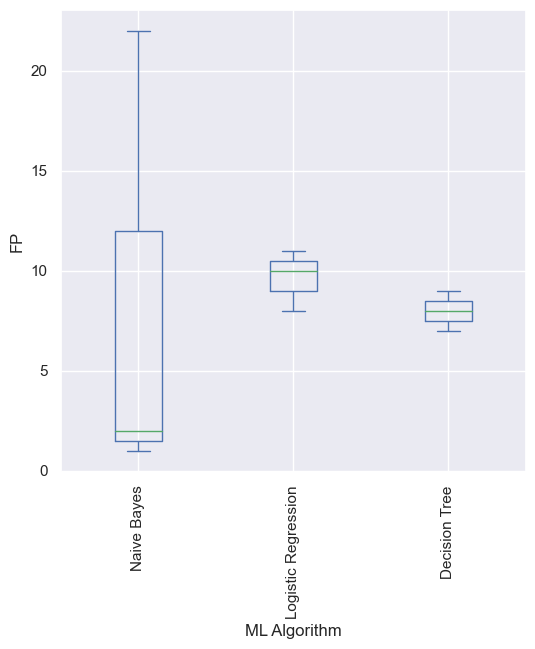

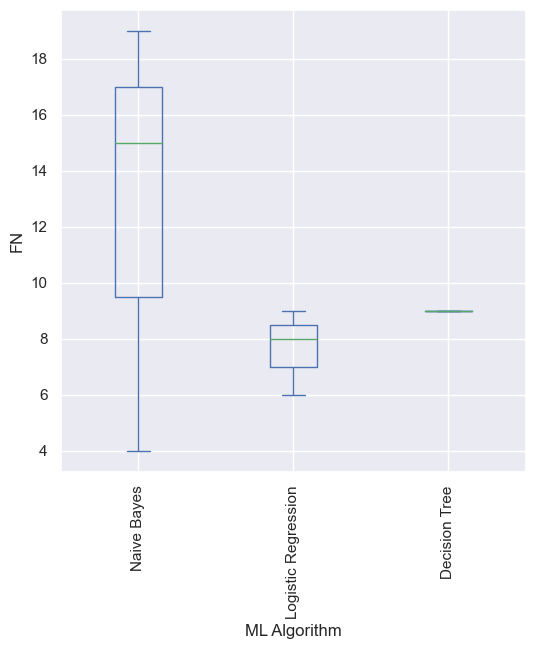

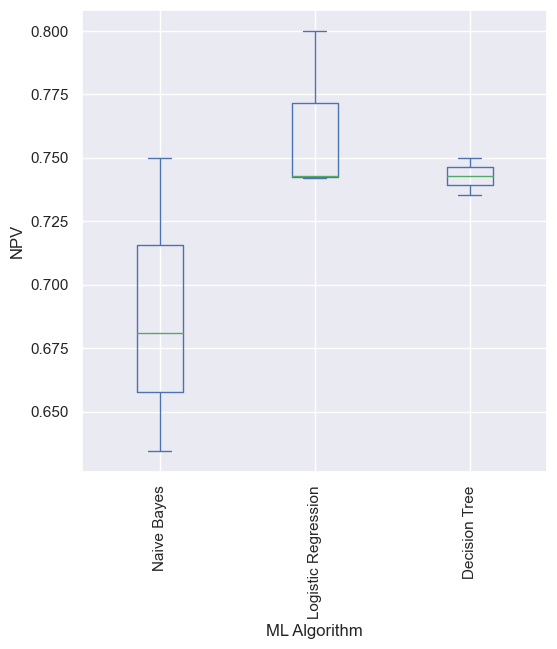

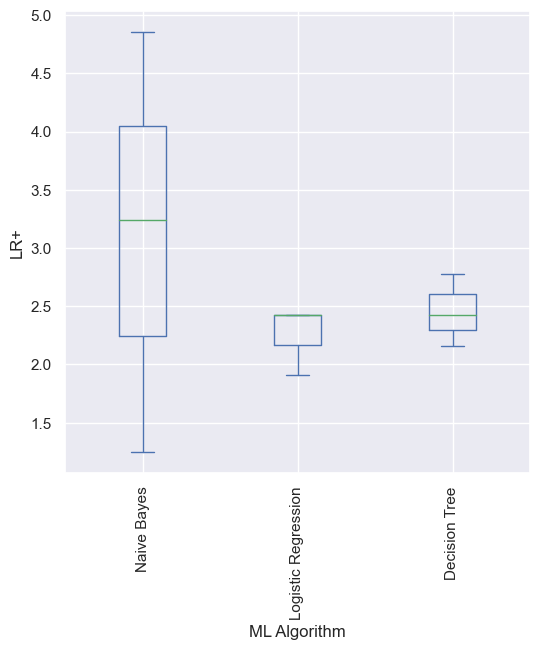

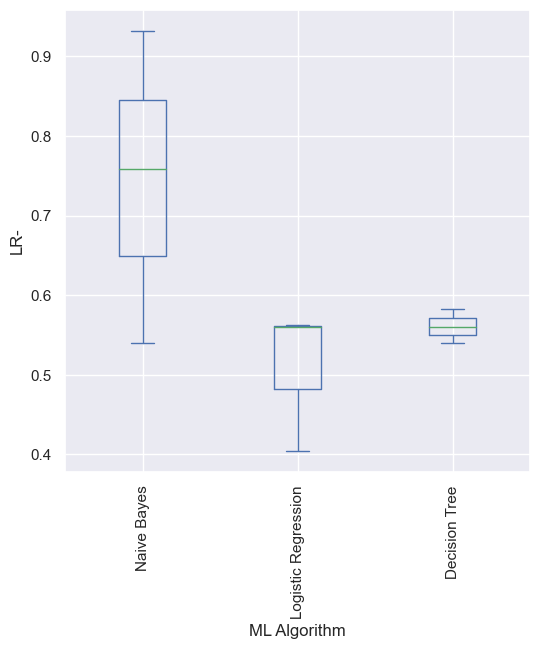

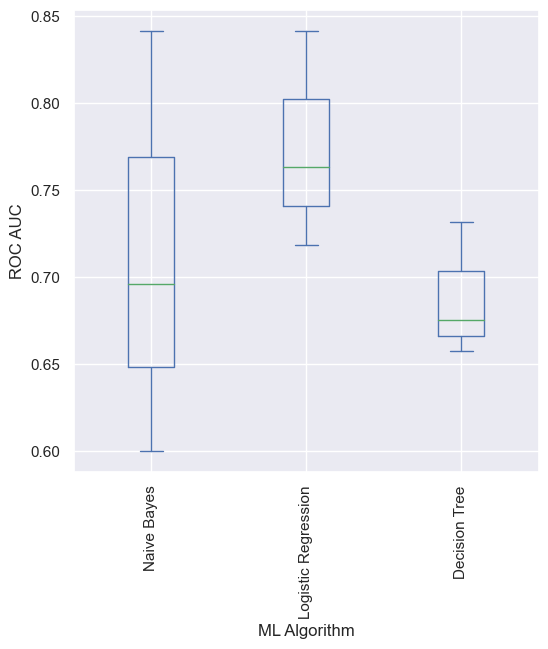

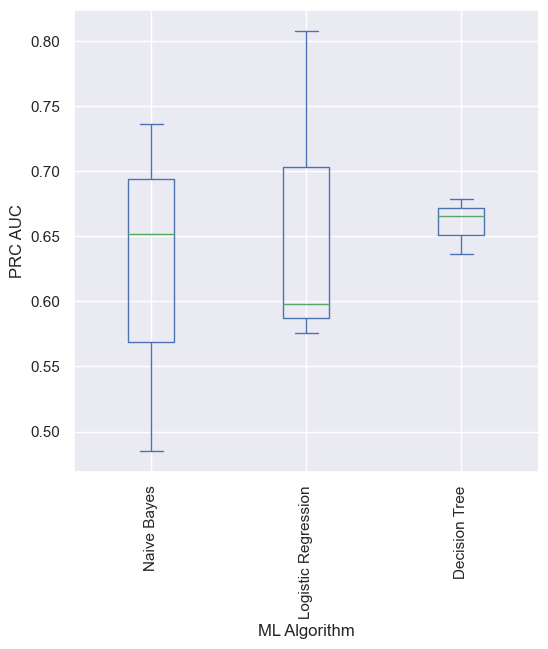

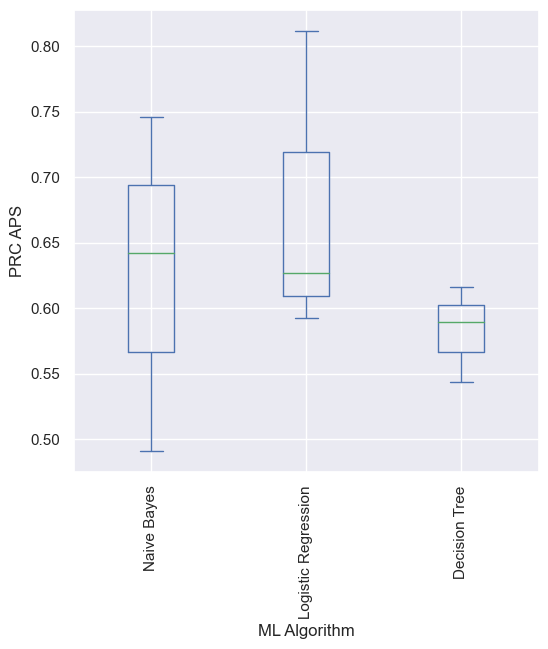

INFO: Running Non-Parametric Statistical Significance Analysis...
INFO: Preparing for Model Feature Importance Plotting...
INFO: Generating Feature Importance Boxplot and Histograms...


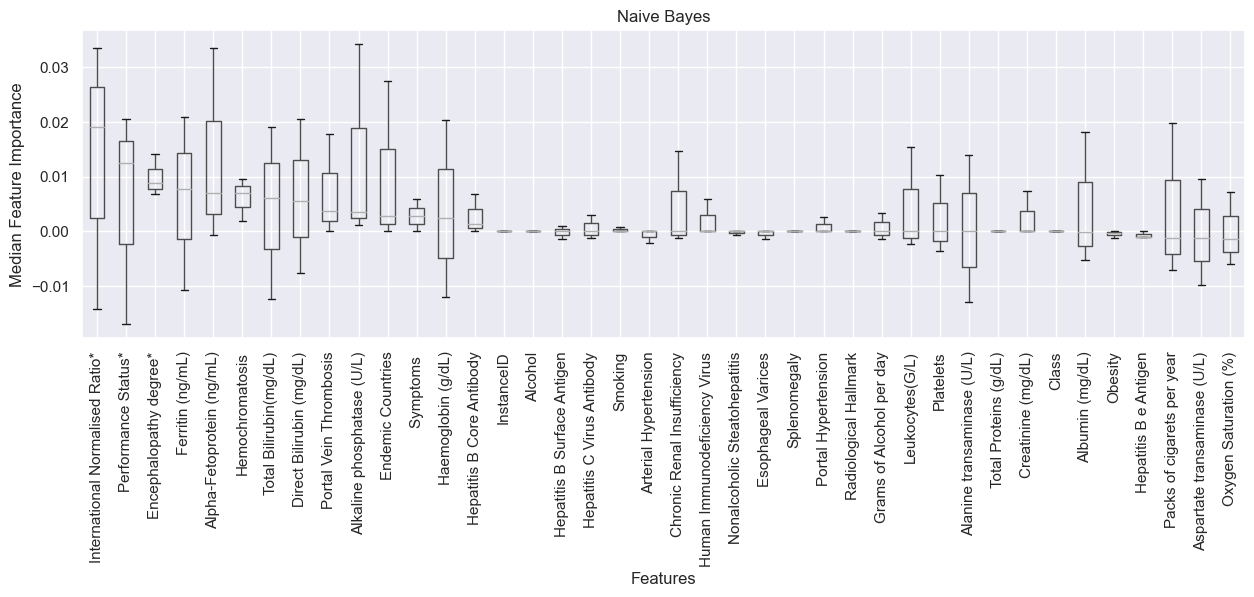

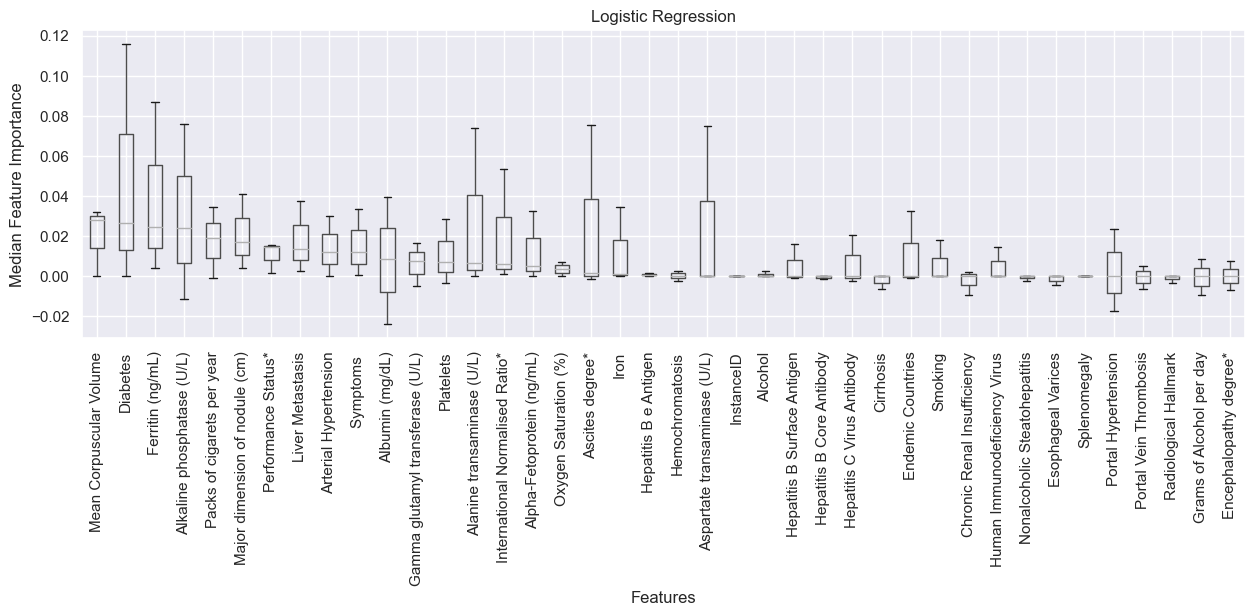

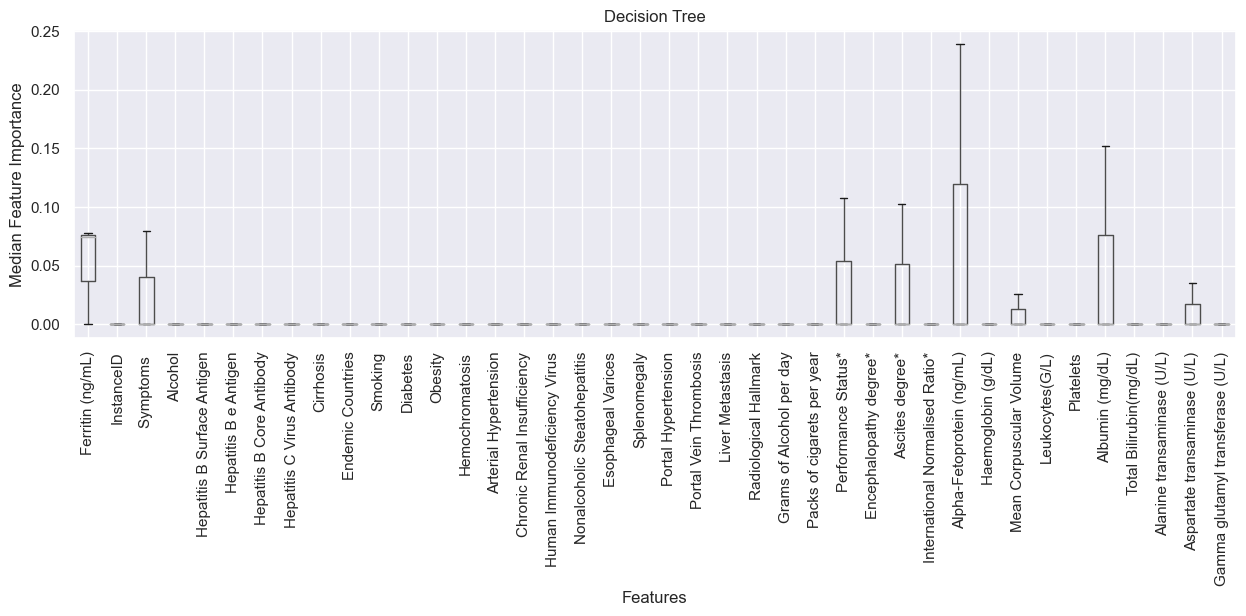

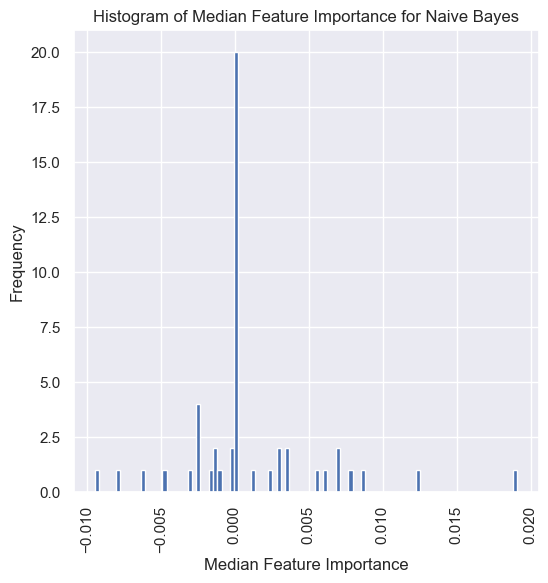

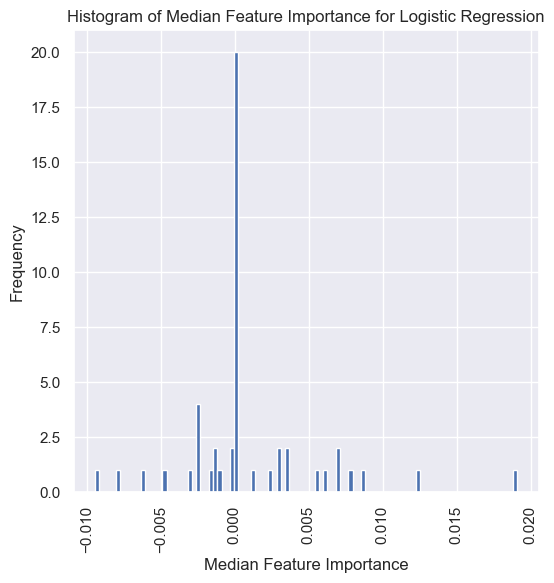

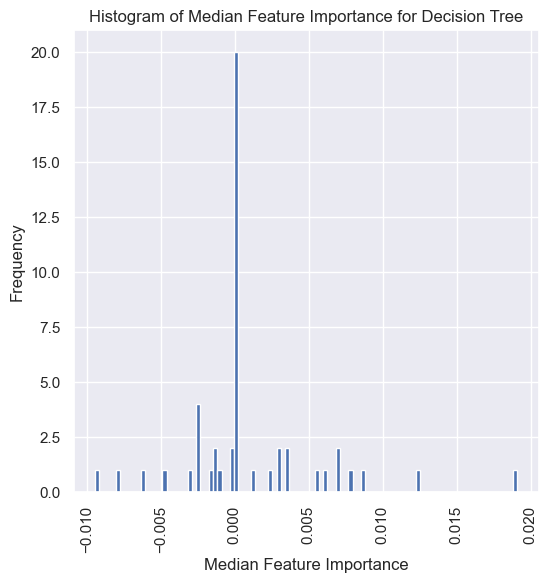

INFO: Generating Composite Feature Importance Plots...


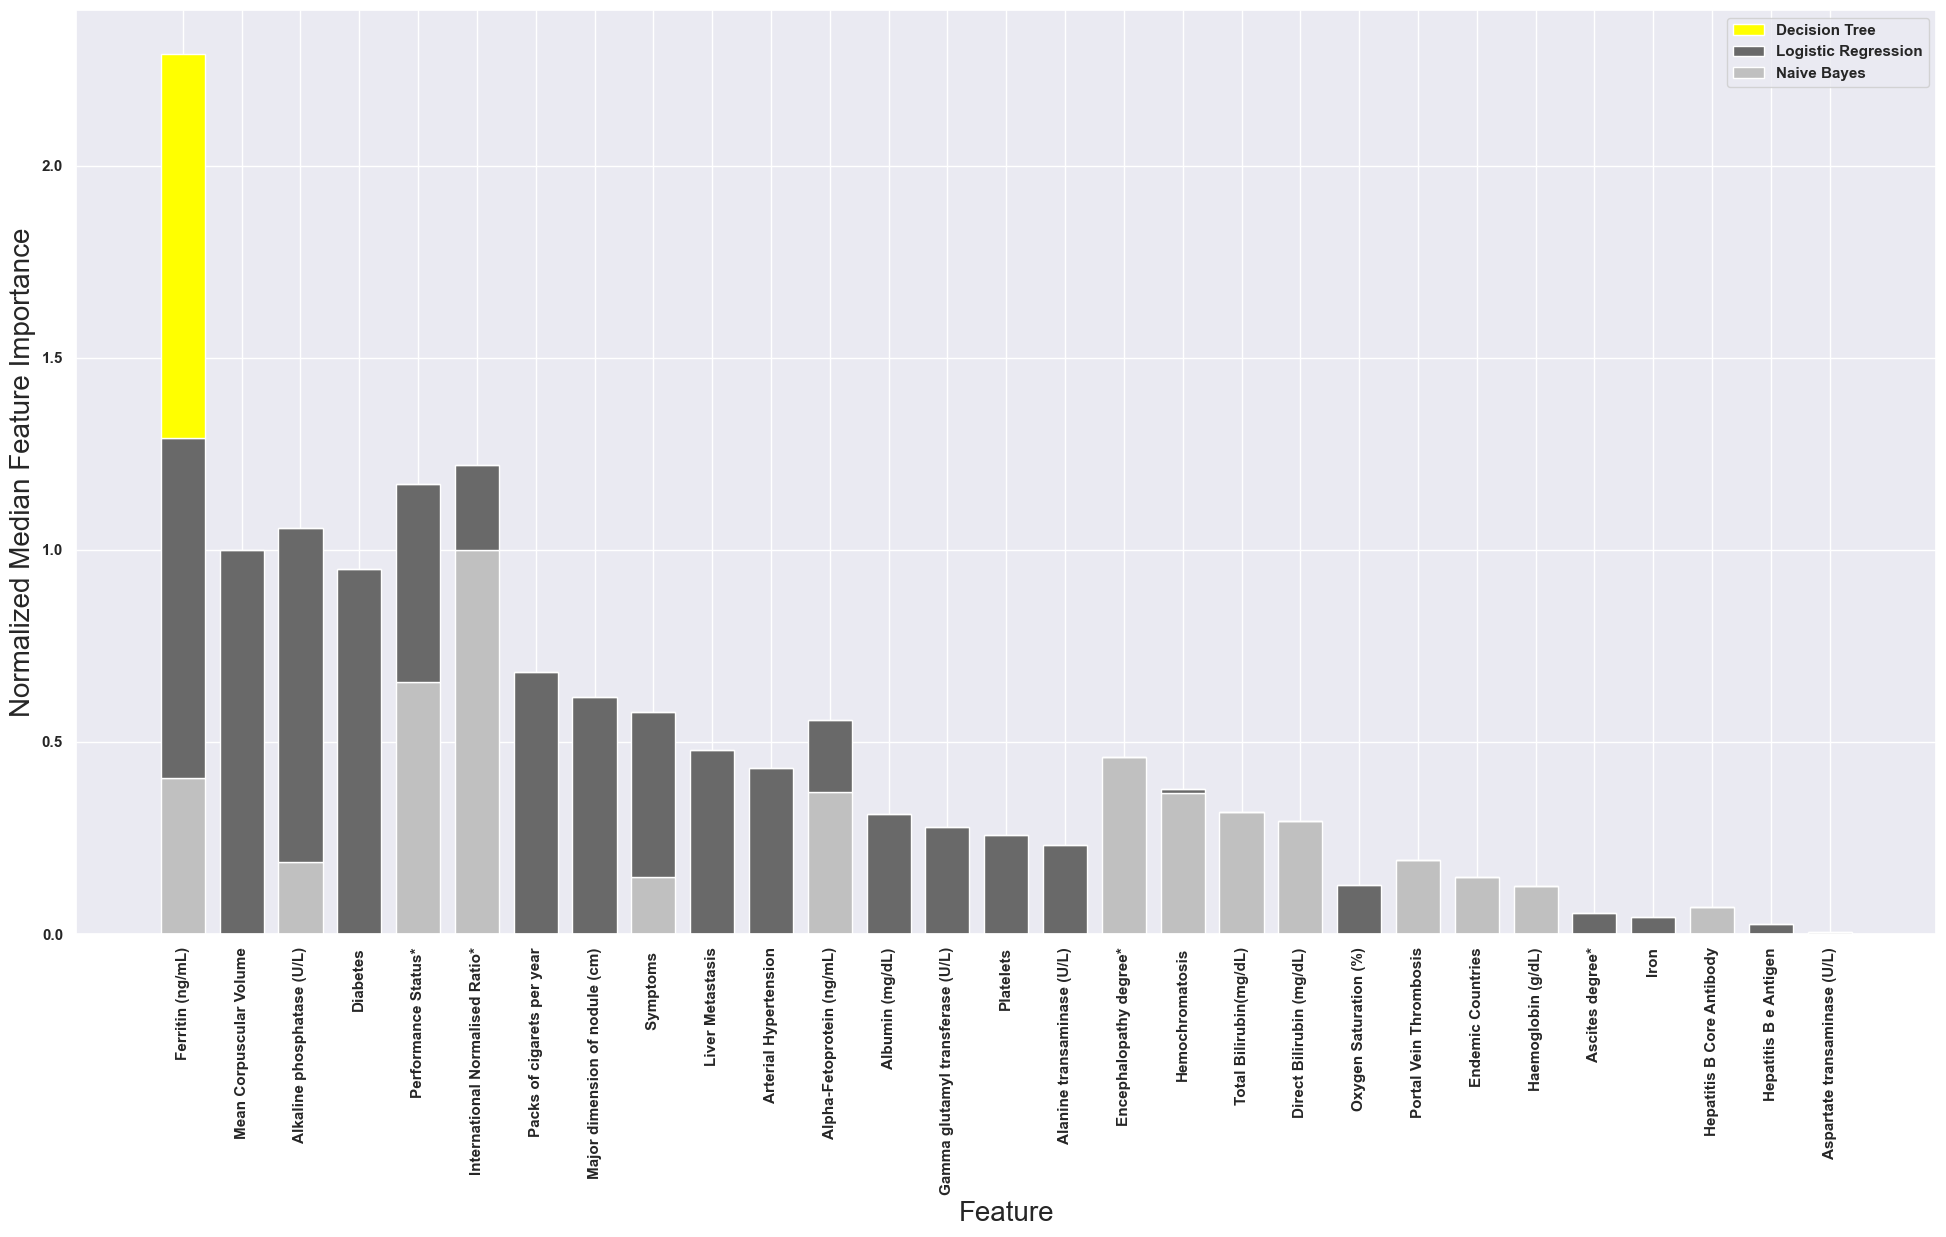

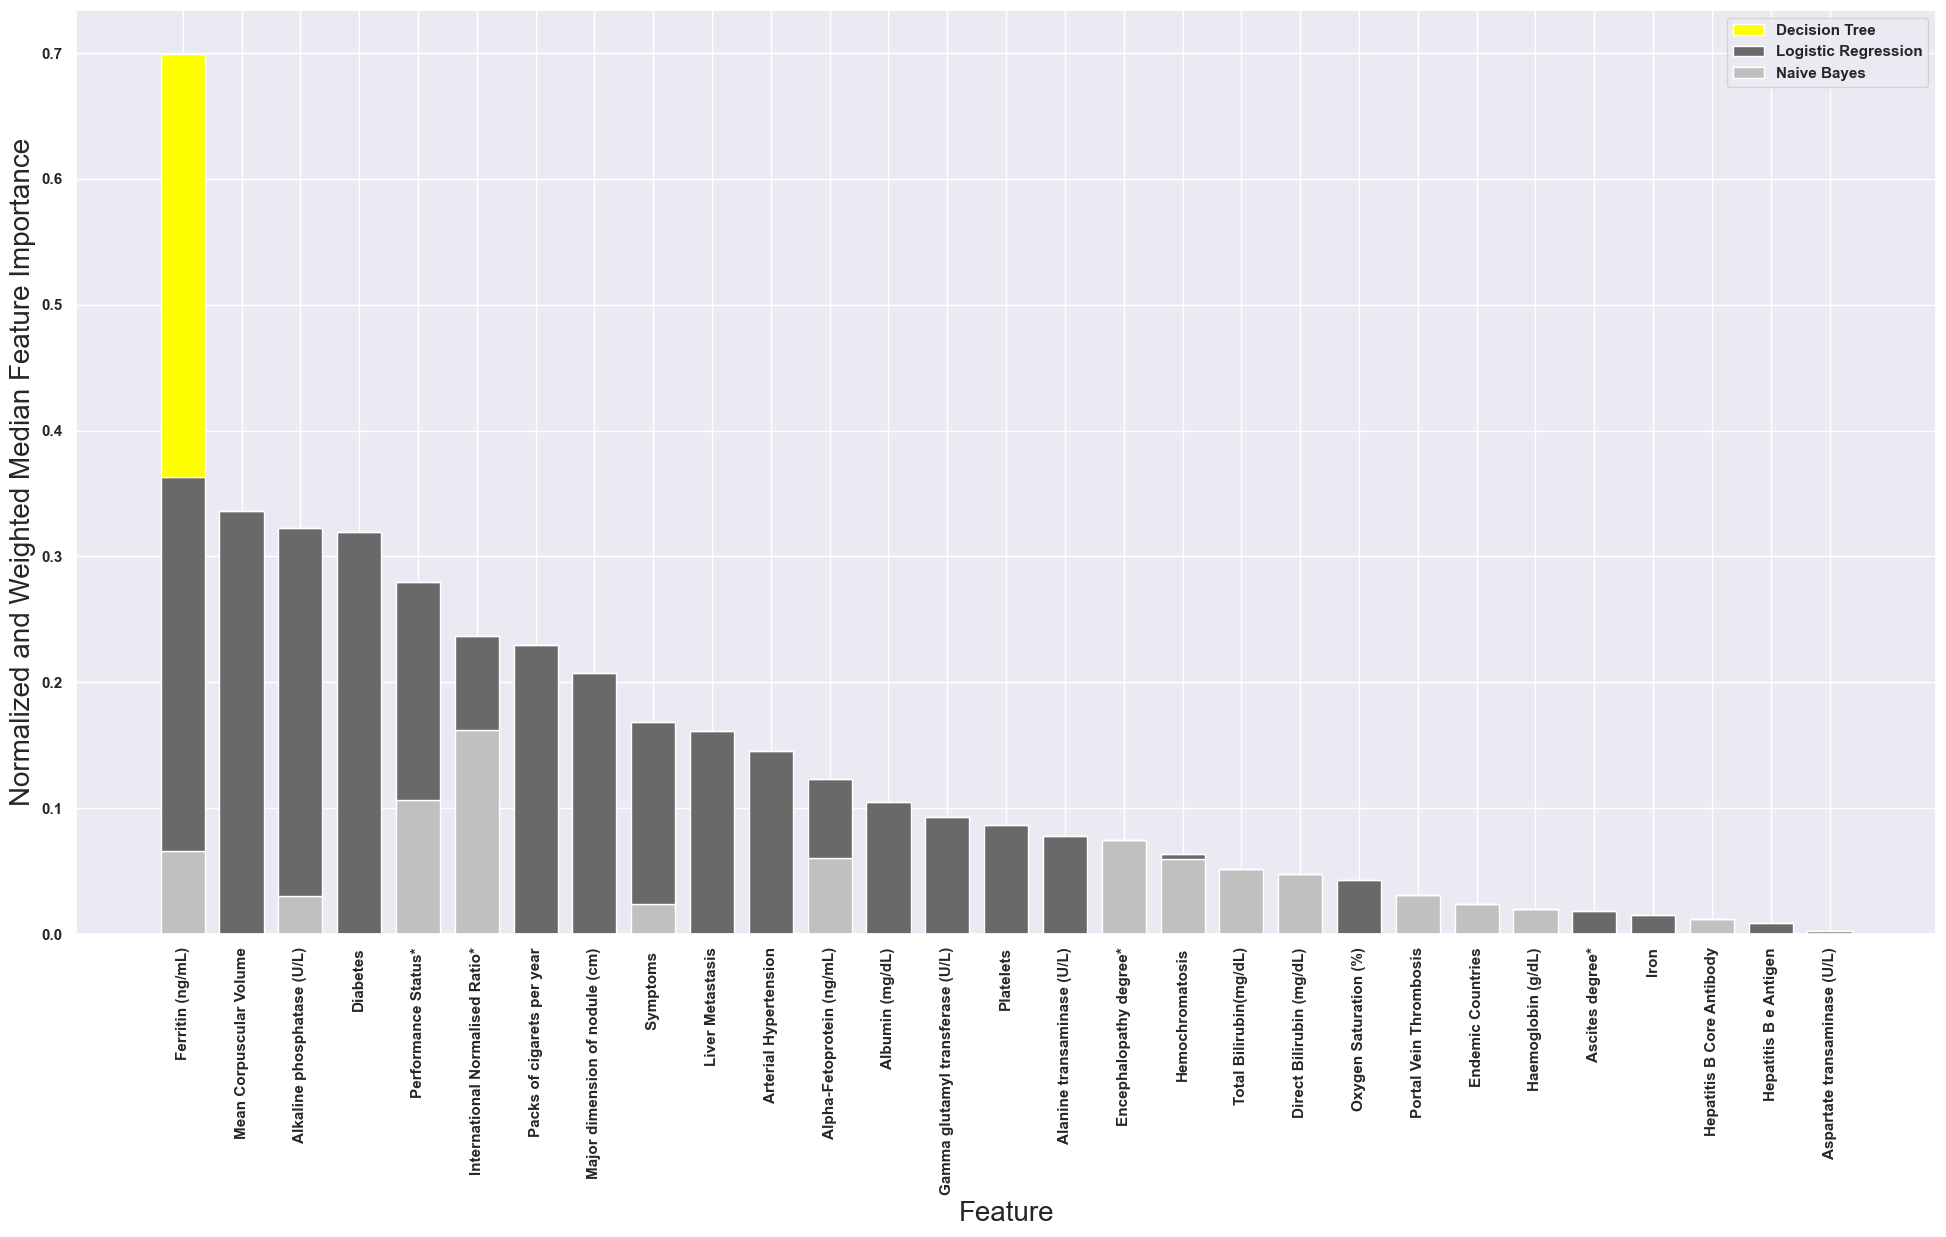

INFO: hcc-data_example_no_covariates phase 5 complete
INFO: Running Statistics Summary for demodata
INFO: Running stats on Naive Bayes


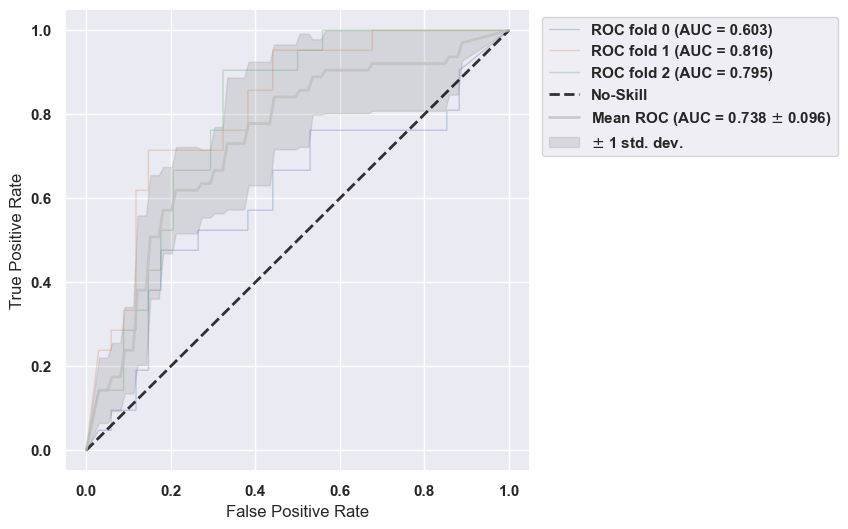

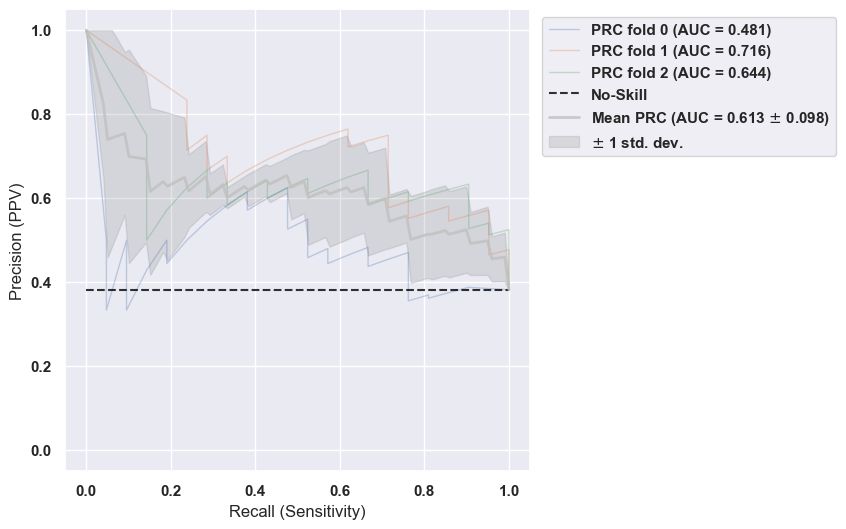

INFO: Running stats on Logistic Regression


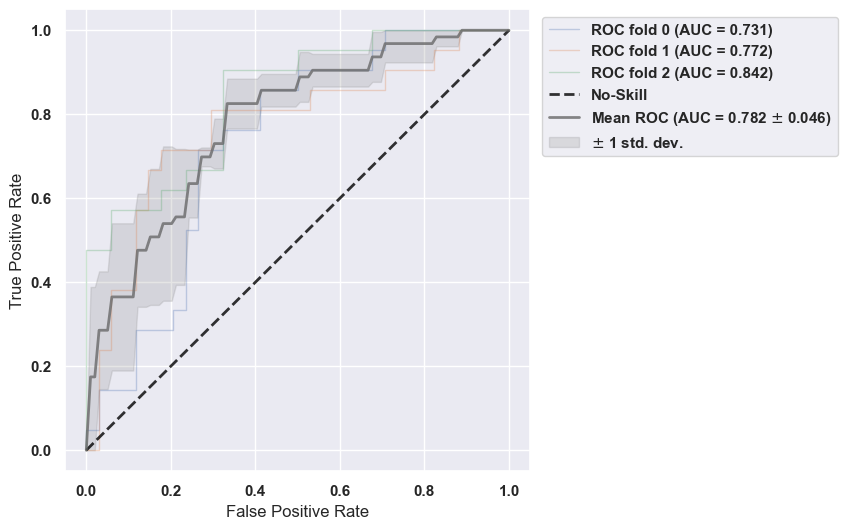

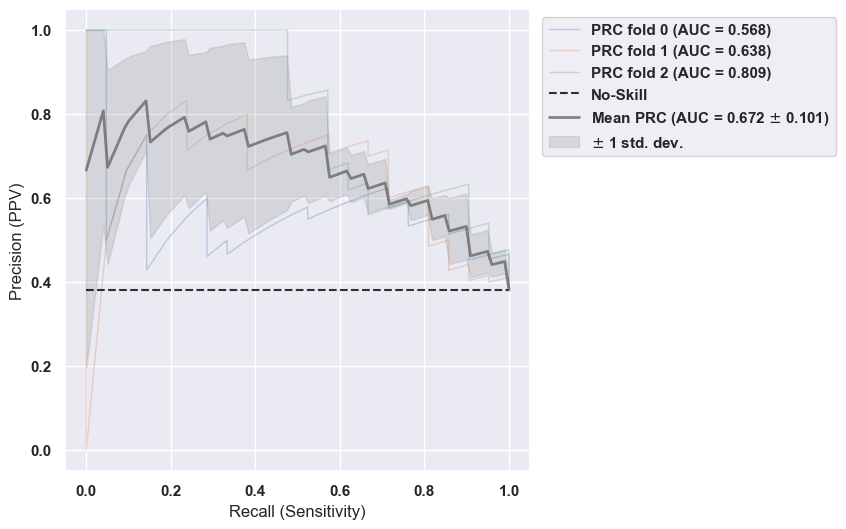

INFO: Running stats on Decision Tree


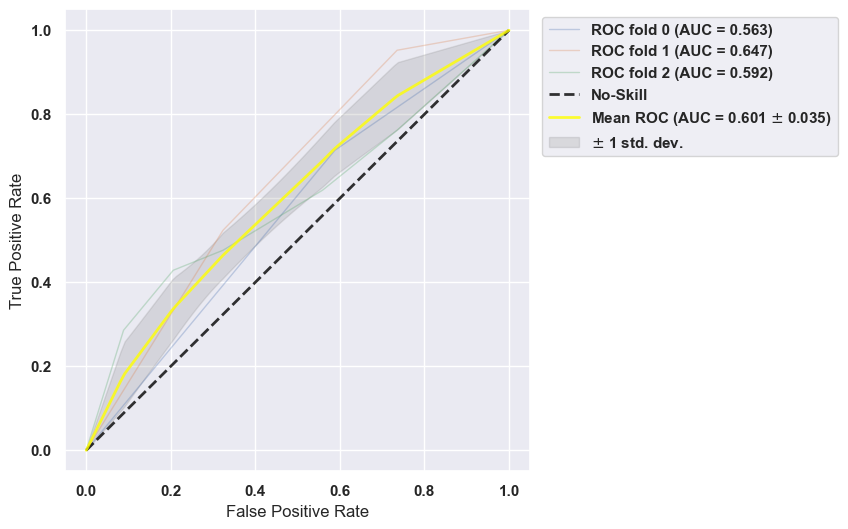

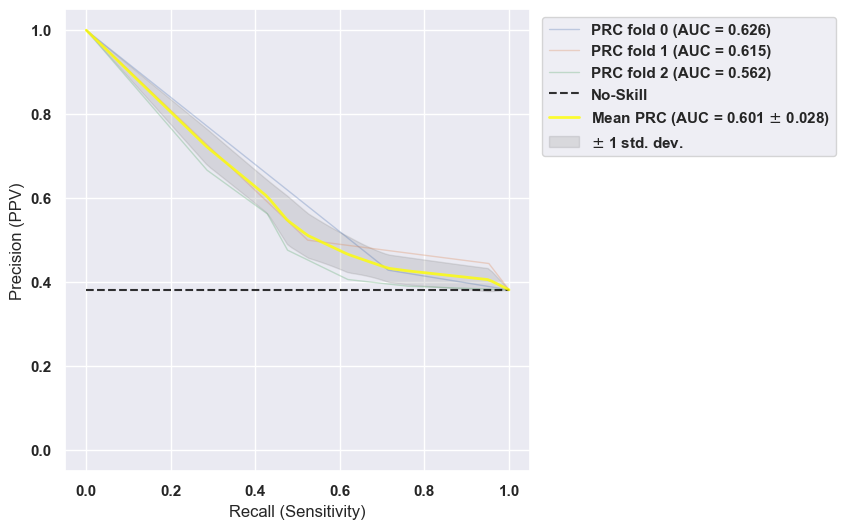

INFO: Generating ROC and PRC plots...


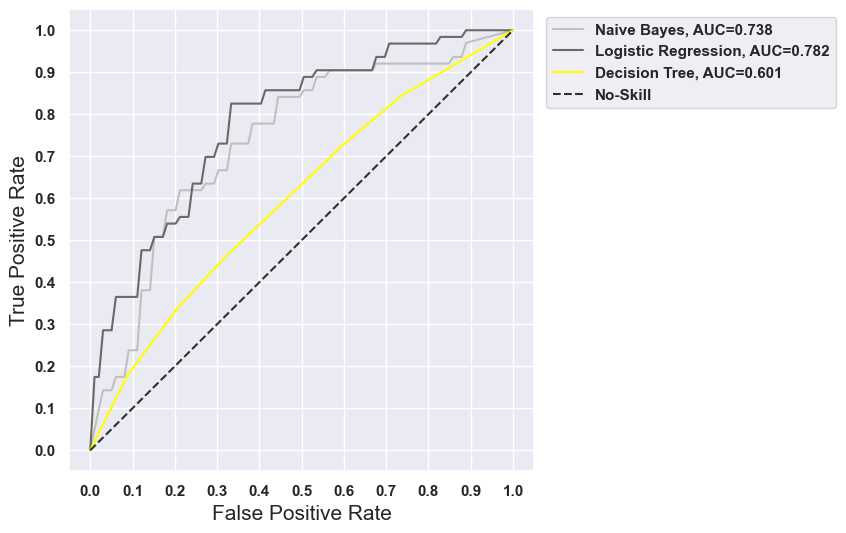

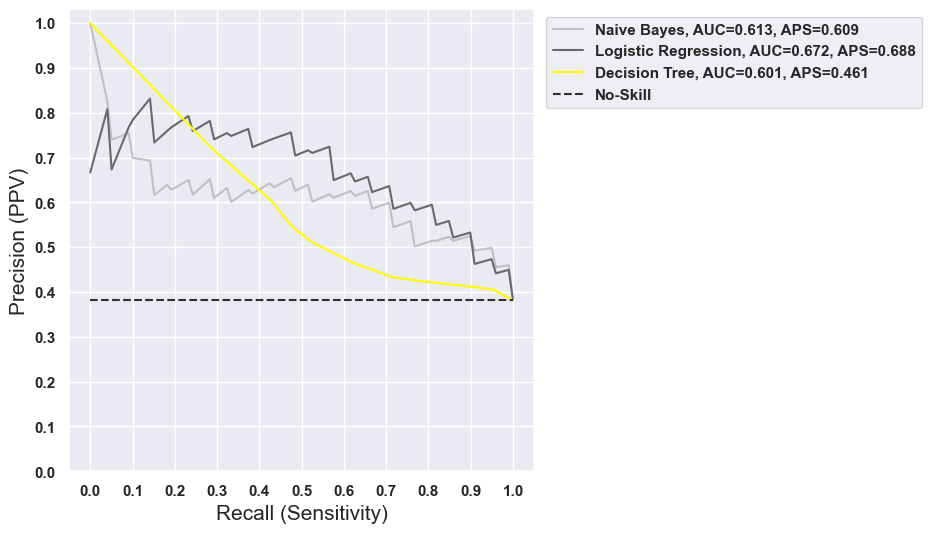

INFO: Saving Metric Summaries...
INFO: Generating Metric Boxplots...


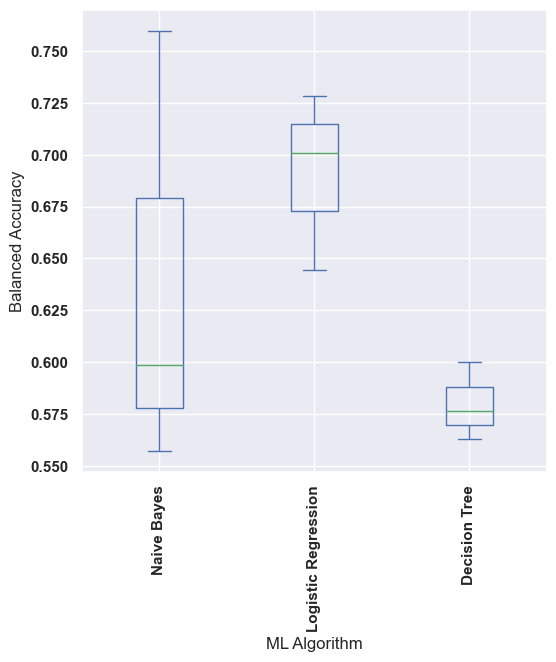

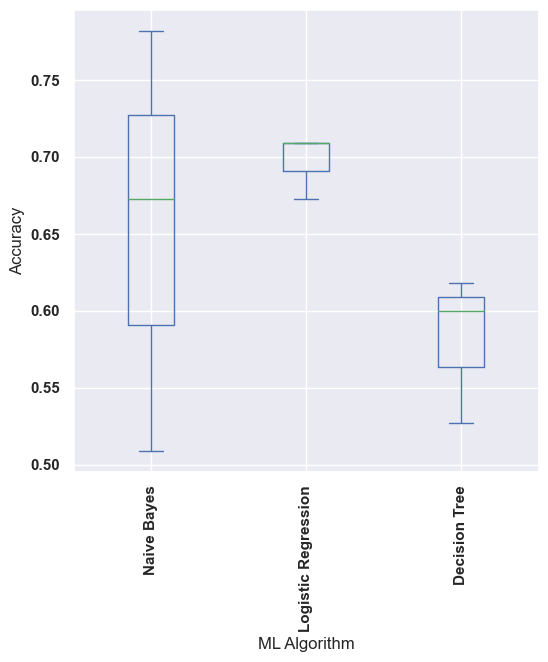

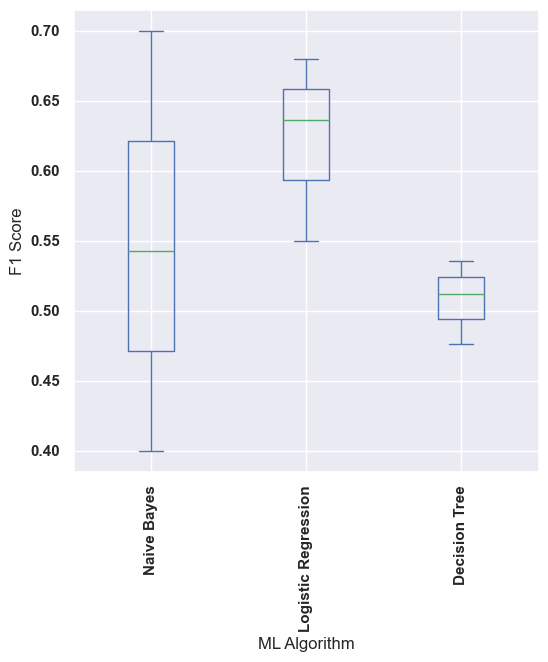

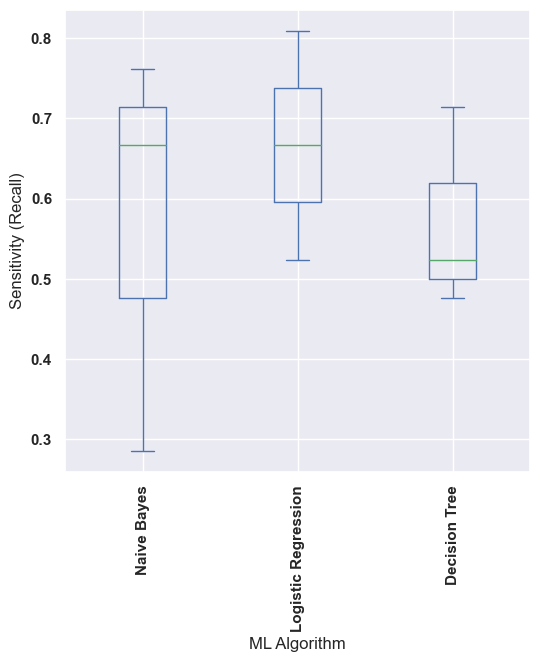

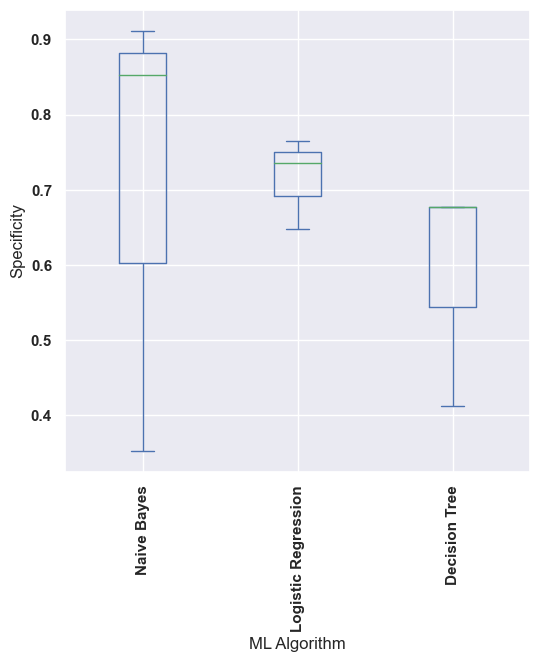

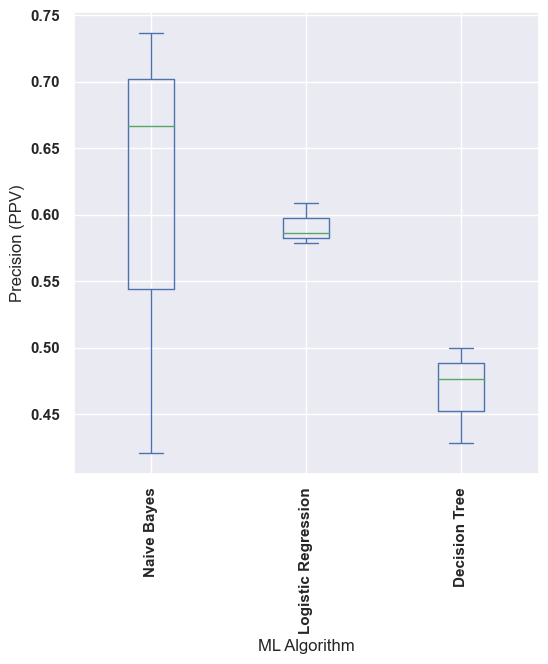

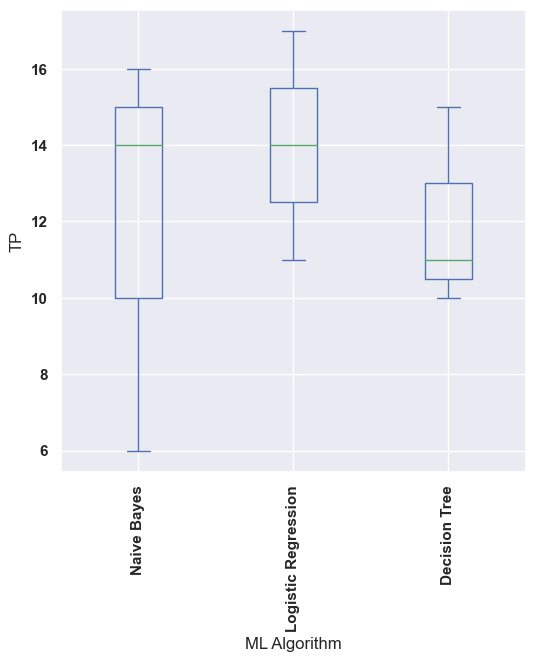

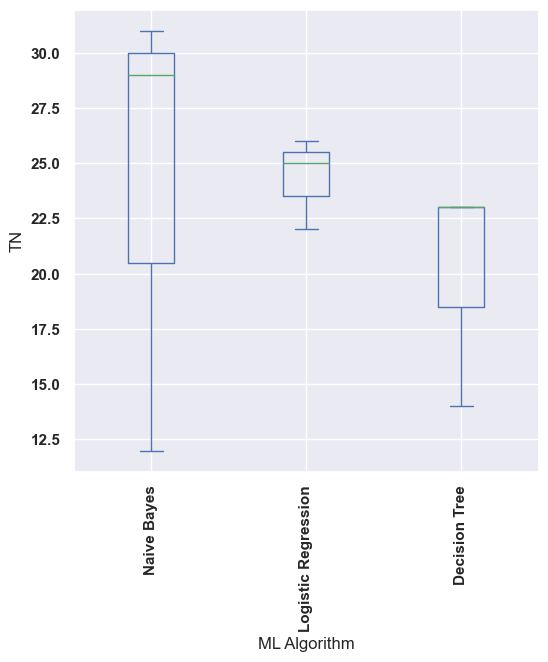

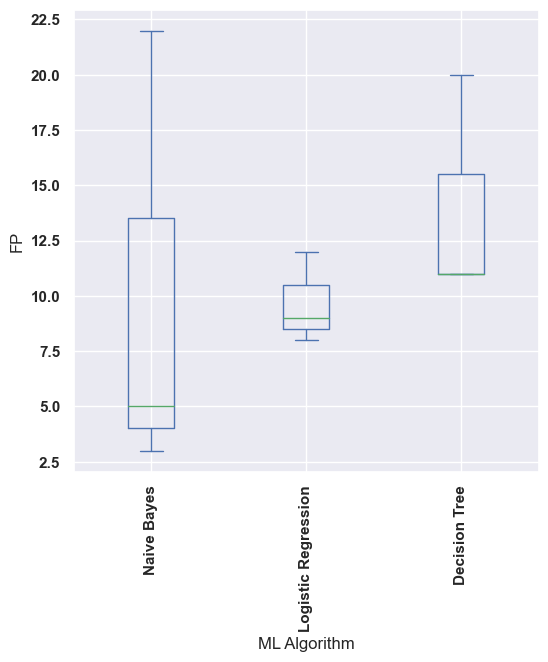

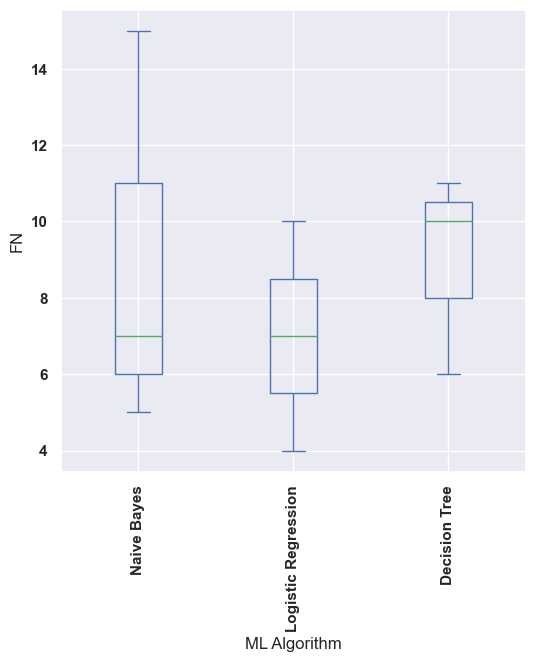

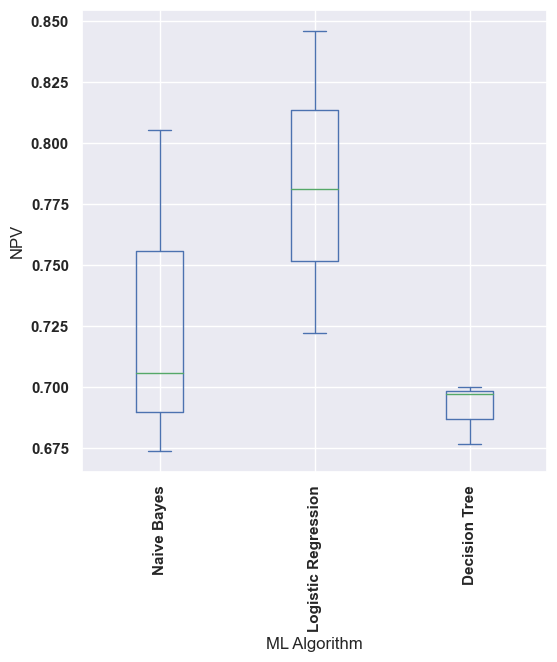

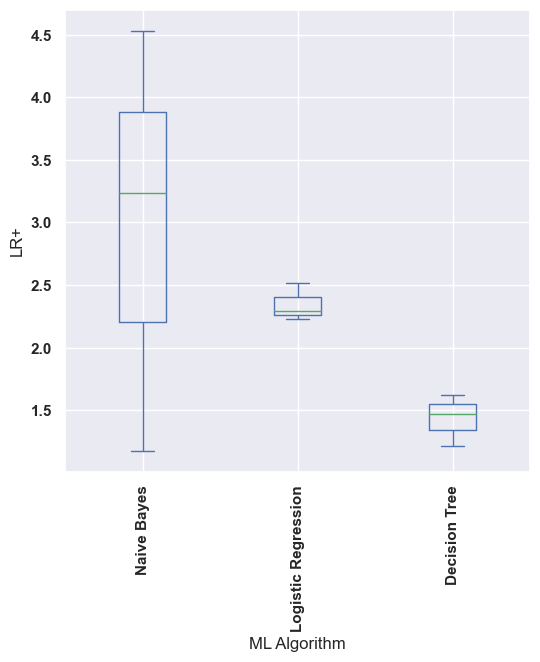

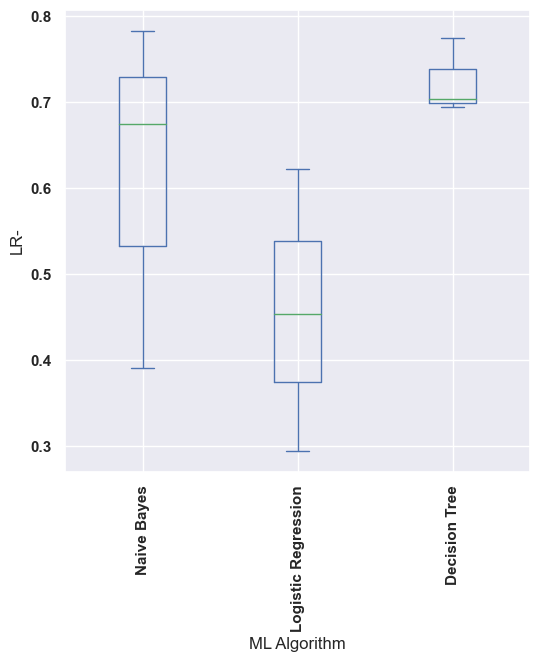

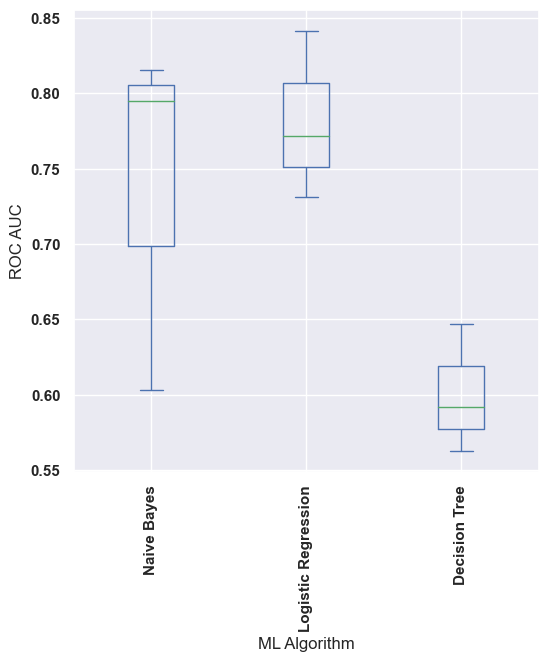

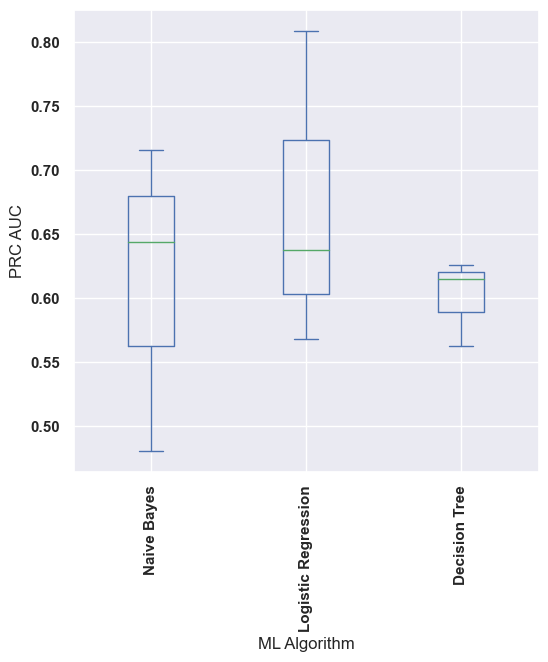

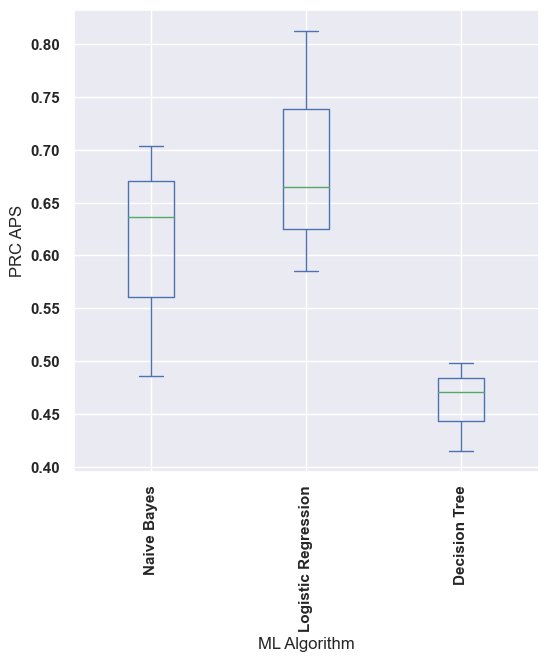

INFO: Running Non-Parametric Statistical Significance Analysis...
INFO: Preparing for Model Feature Importance Plotting...
INFO: Generating Feature Importance Boxplot and Histograms...


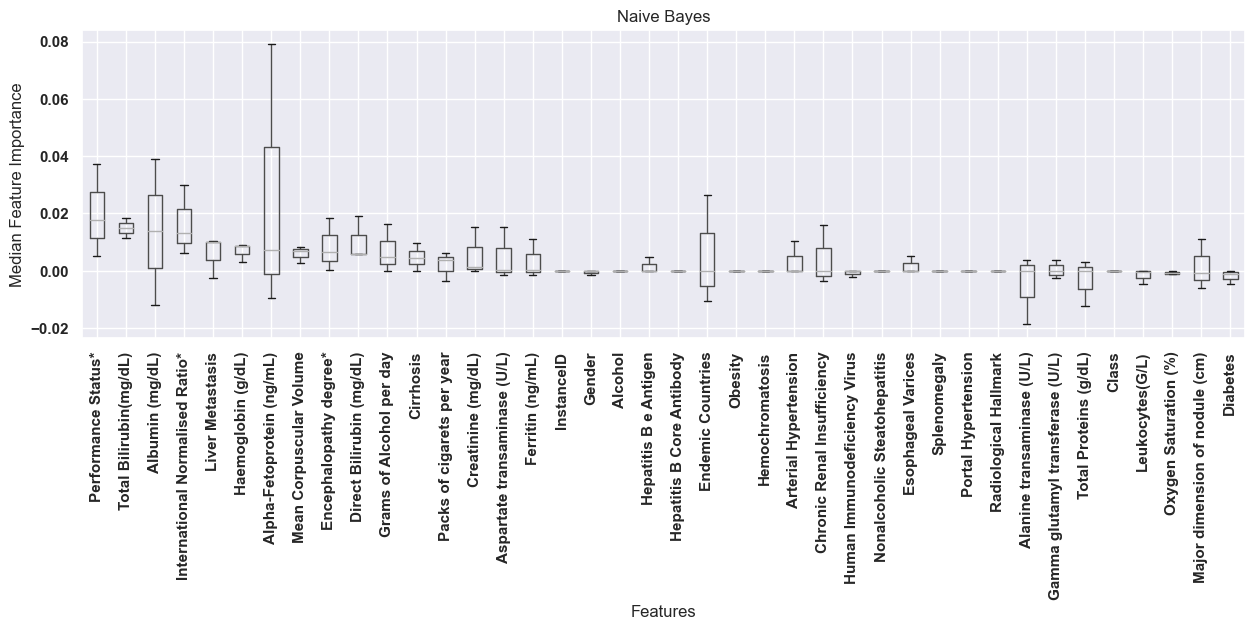

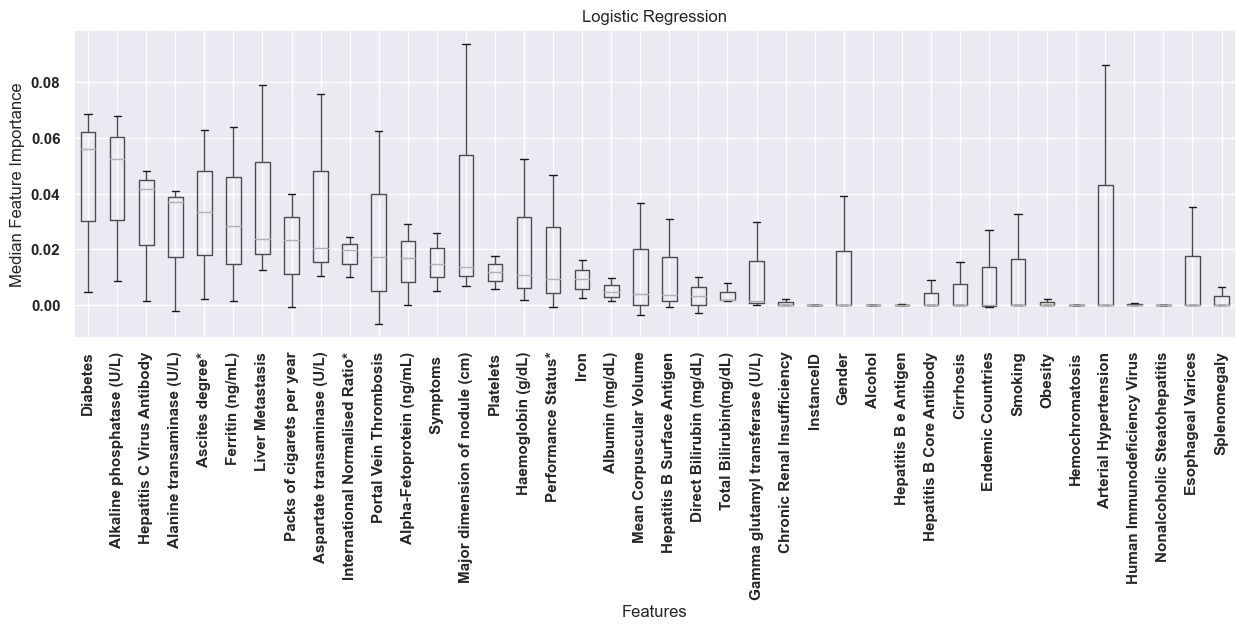

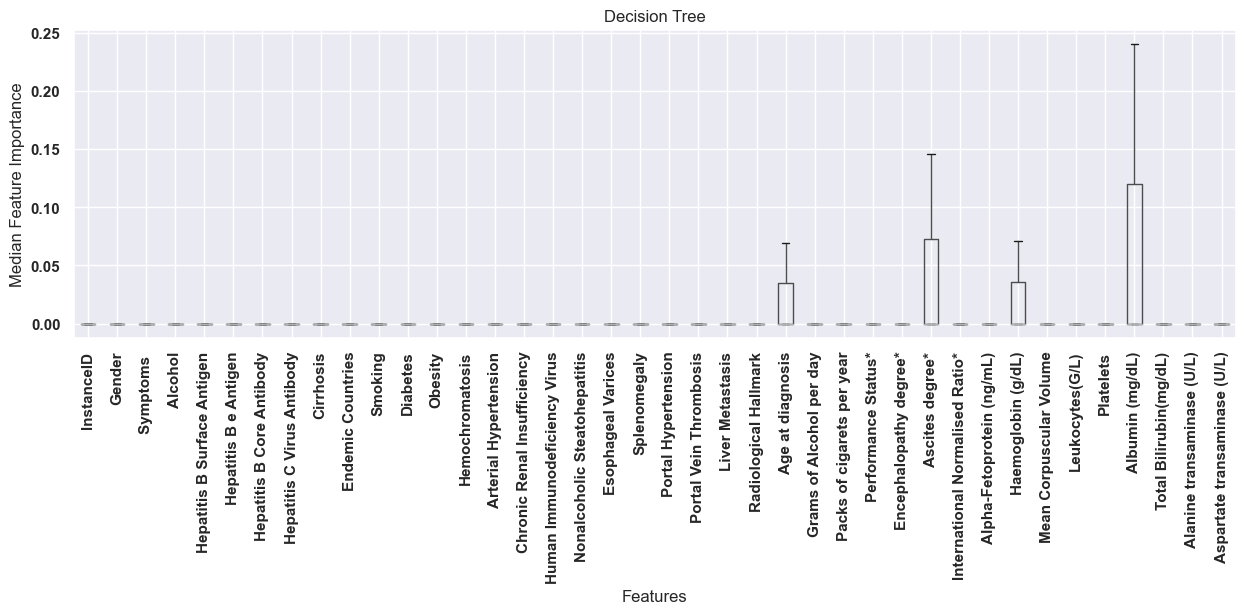

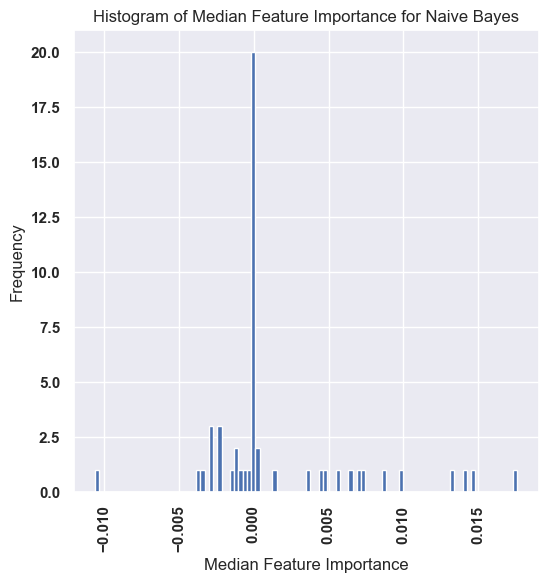

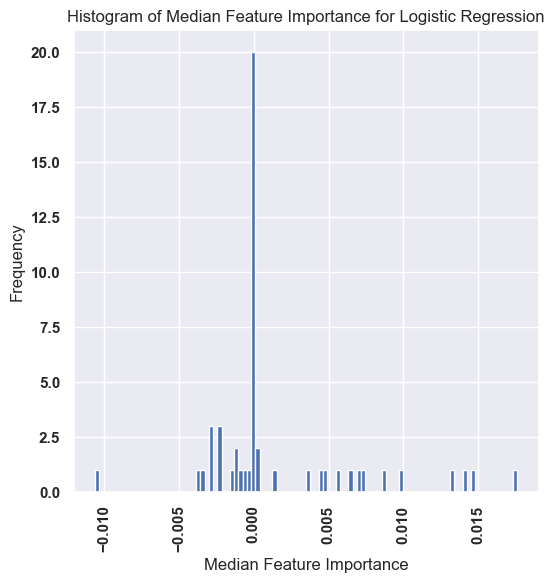

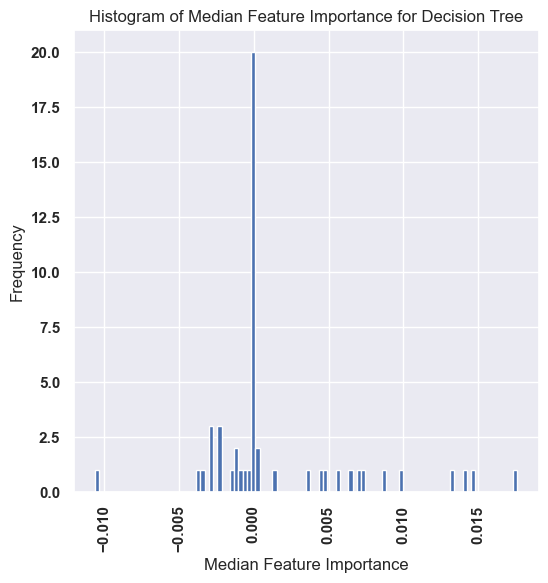

INFO: Generating Composite Feature Importance Plots...


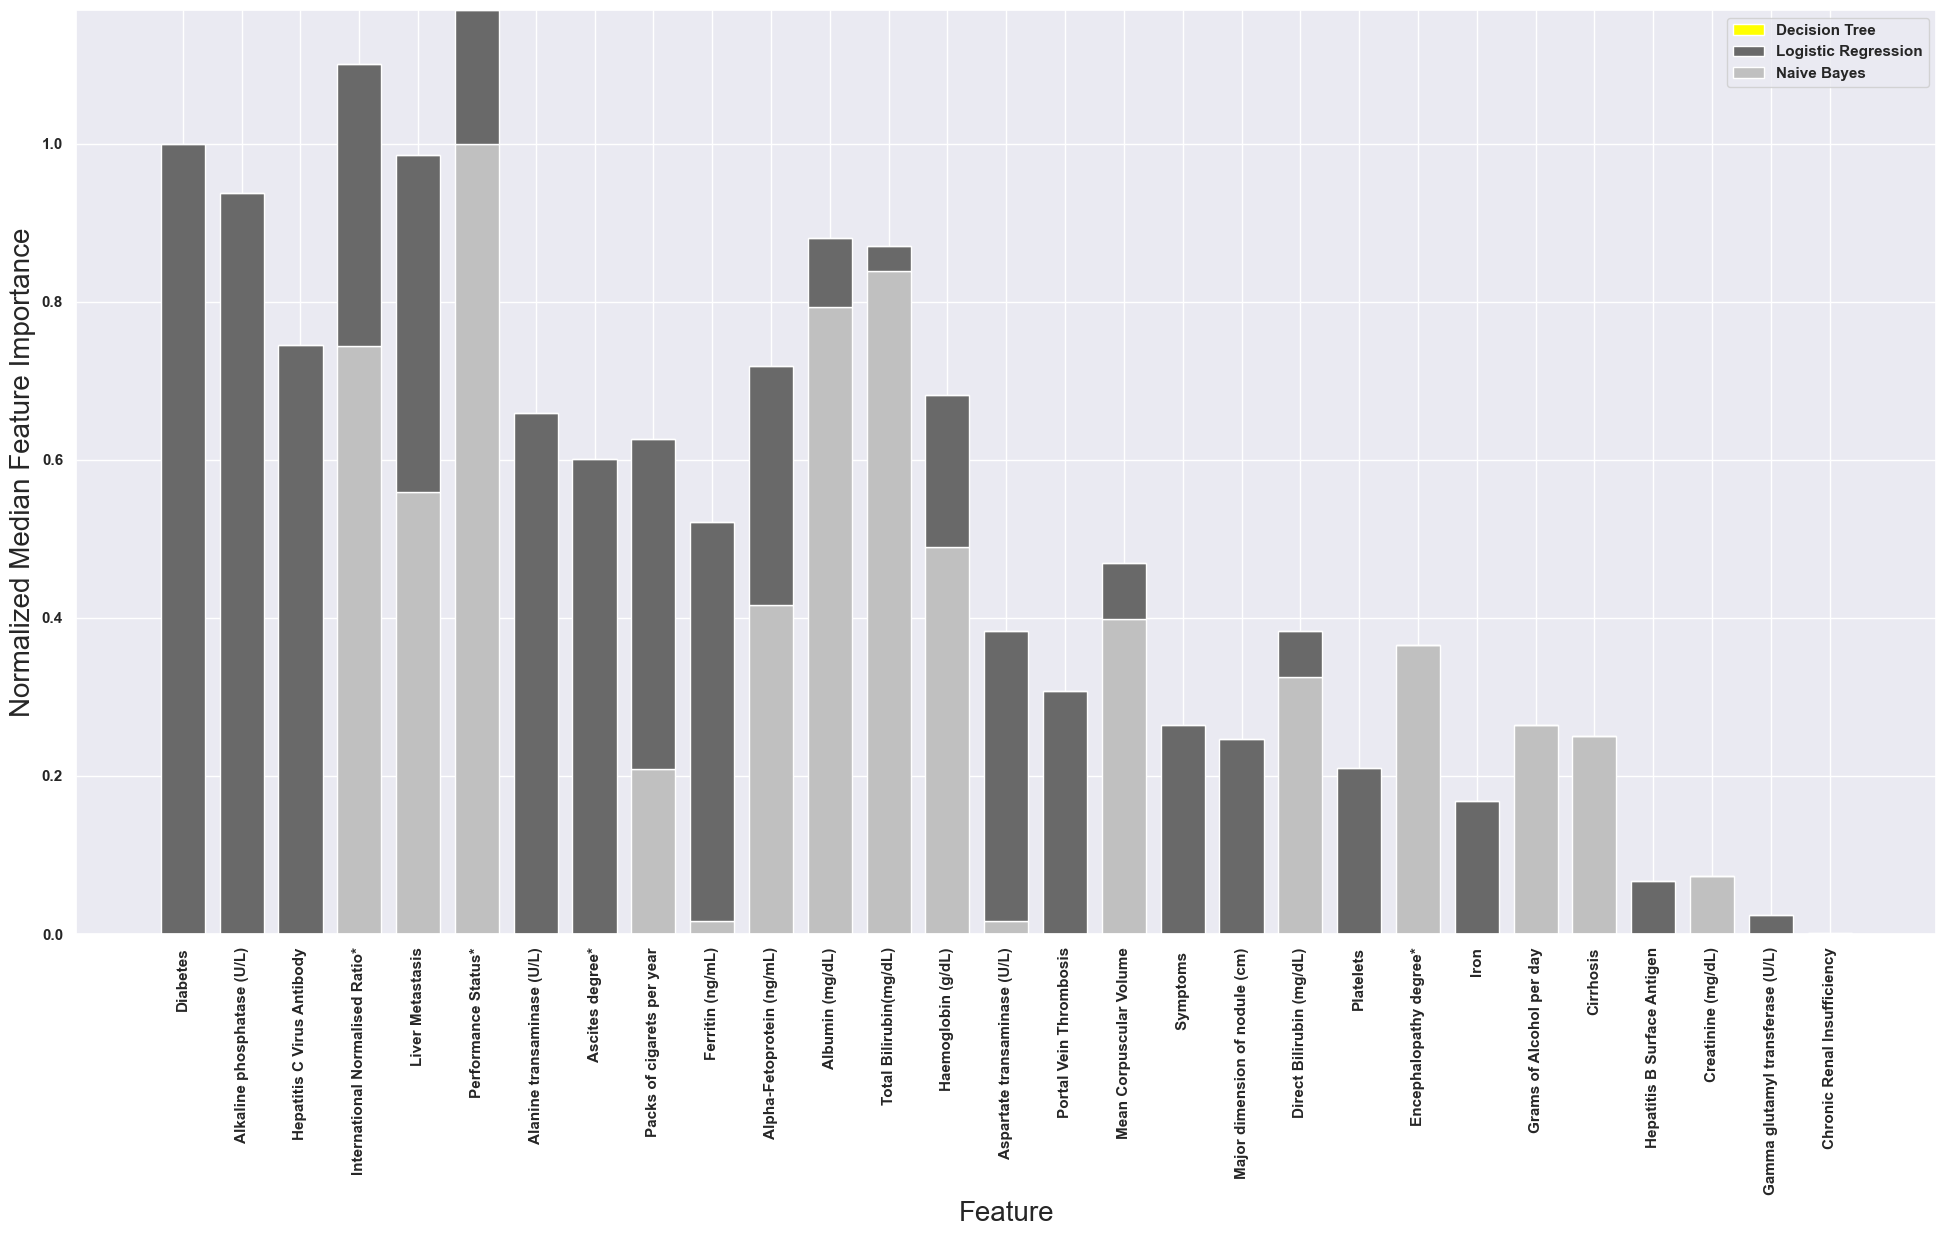

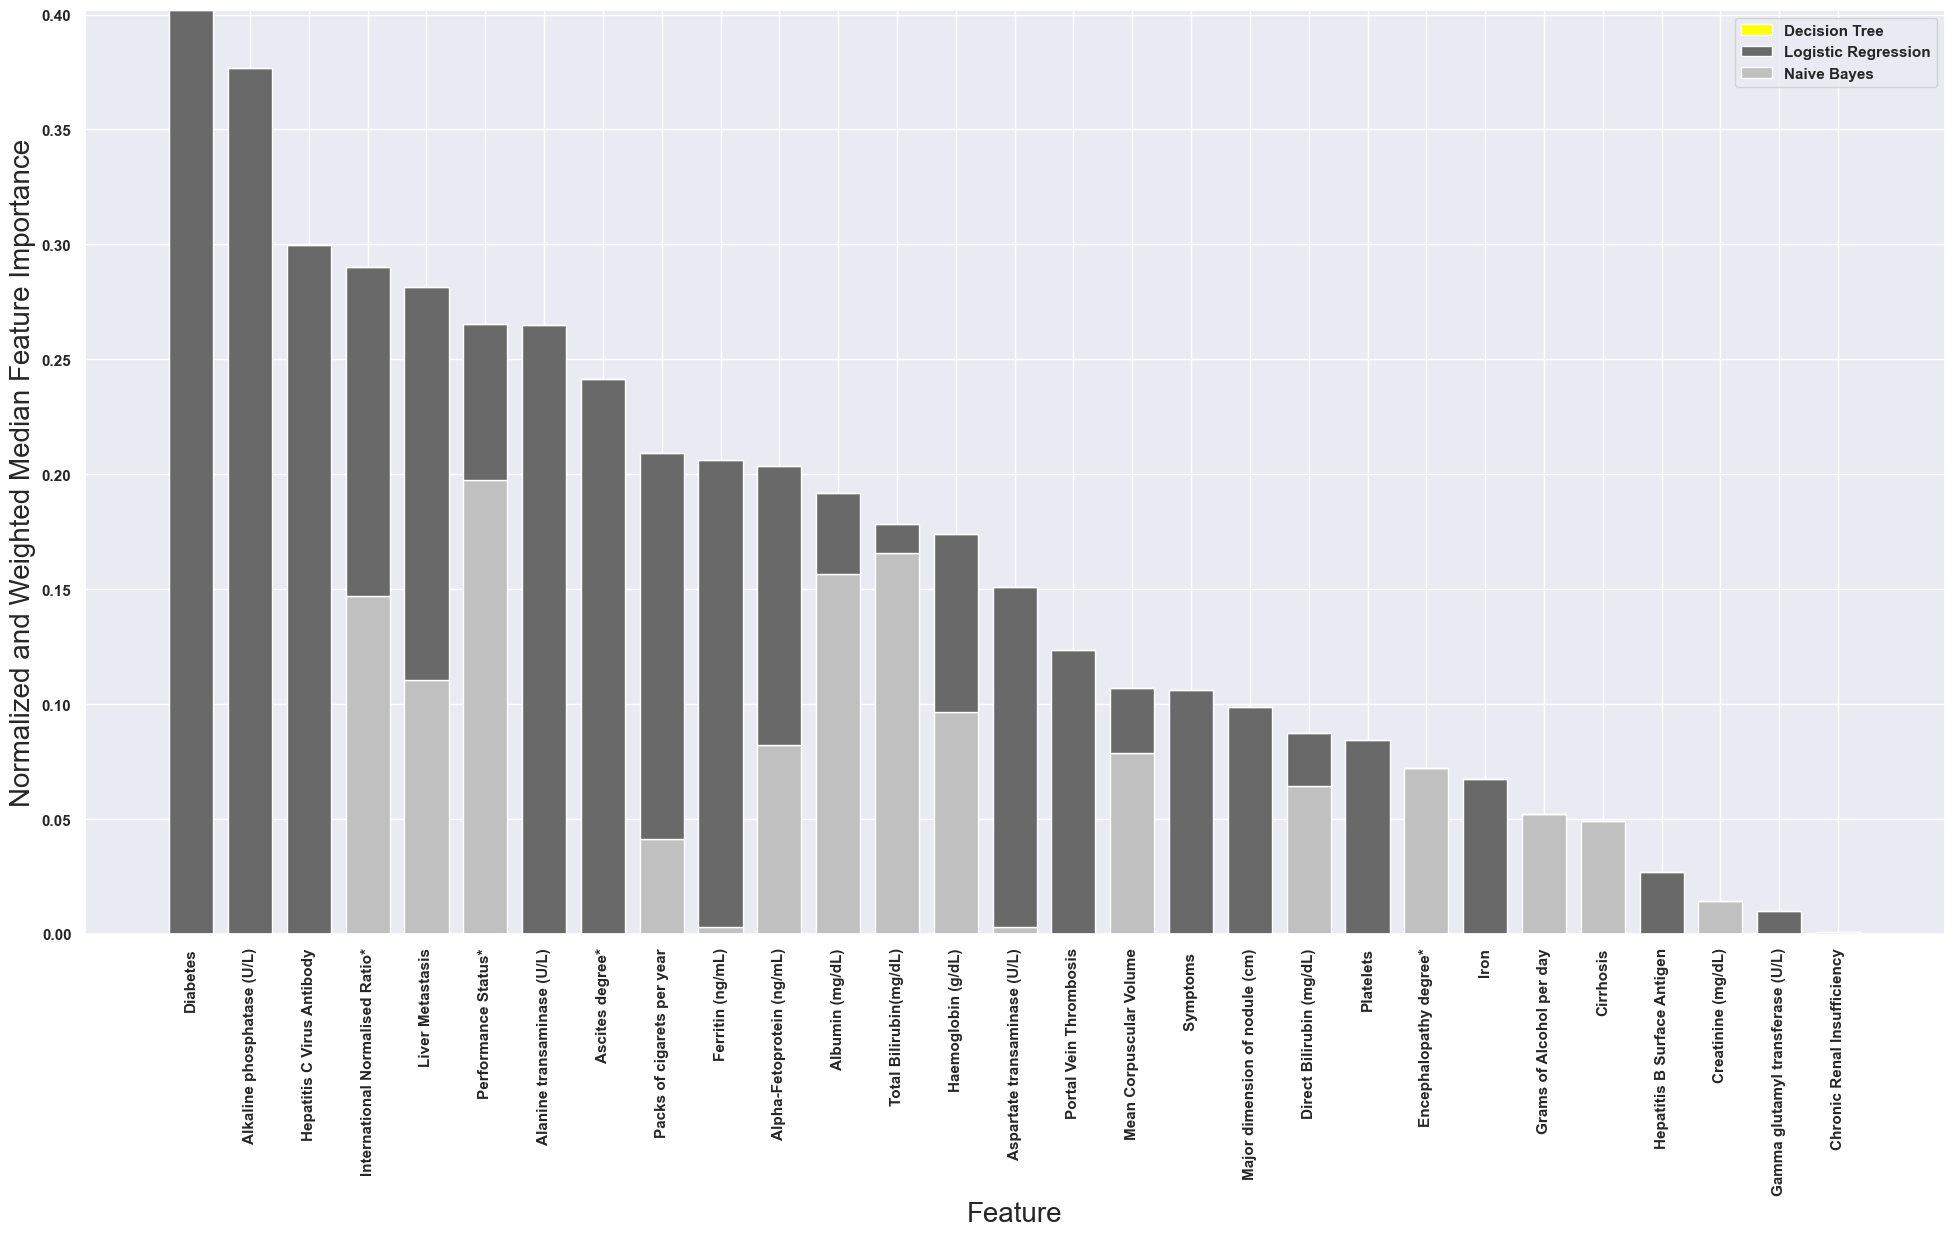

INFO: demodata phase 5 complete


In [15]:
from streamline.runners.stats_runner import StatsRunner
stats = StatsRunner(output_path, experiment_name, 
                    class_label=class_label, instance_label=instance_label, 
                    algorithms=["NB", "LR", "DT"], show_plots=True)
stats.run(run_parallel=False)

## Phase 7: Dataset Comparison (Optional: Use only if > 1 dataset was analyzed)

In [16]:
#@title Function to check length for more than one dataset case
def len_datasets(output_path, experiment_name):
    datasets = os.listdir(output_path + '/' + experiment_name)
    remove_list = ['metadata.pickle', 'metadata.csv', 'algInfo.pickle',
                   'jobsCompleted', 'logs', 'jobs', 'DatasetComparisons', 'UsefulNotebooks',
                   experiment_name + '_ML_Pipeline_Report.pdf']
    for text in remove_list:
        if text in datasets:
            datasets.remove(text)
    return len(datasets)

INFO: Running Statistical Significance Comparisons Between Multiple Datasets...
INFO: Generate Boxplots Comparing Dataset Performance...


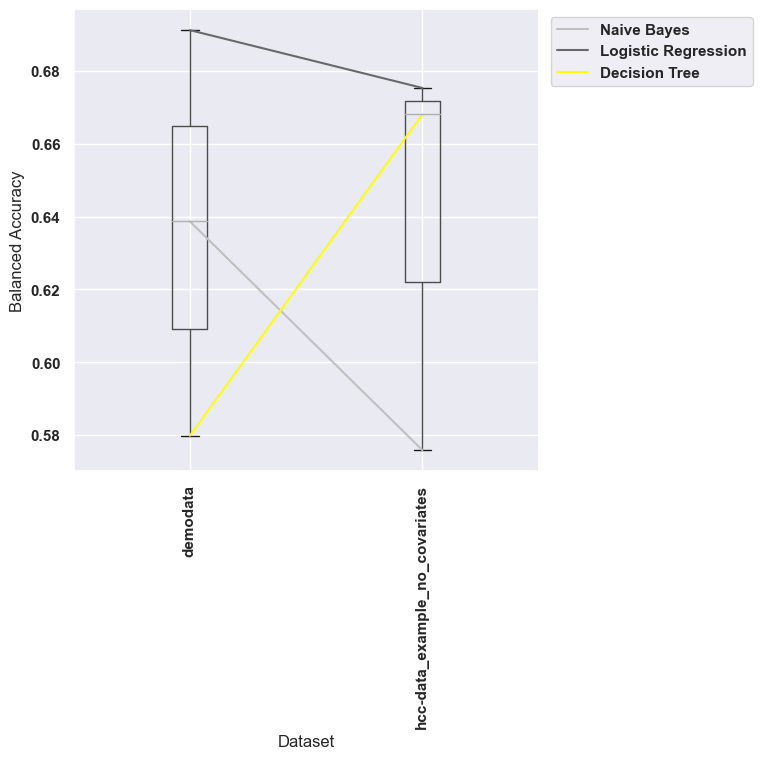

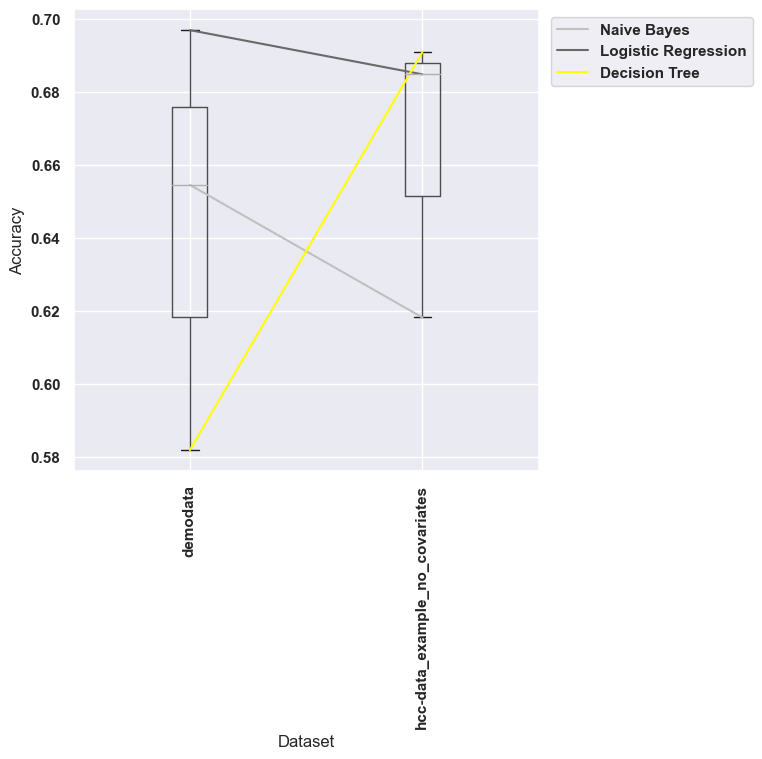

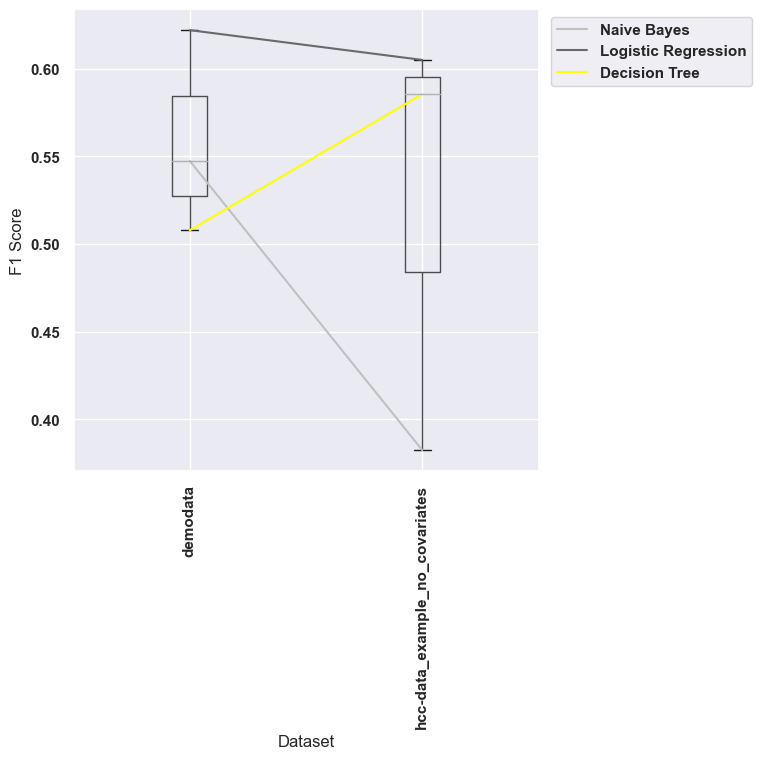

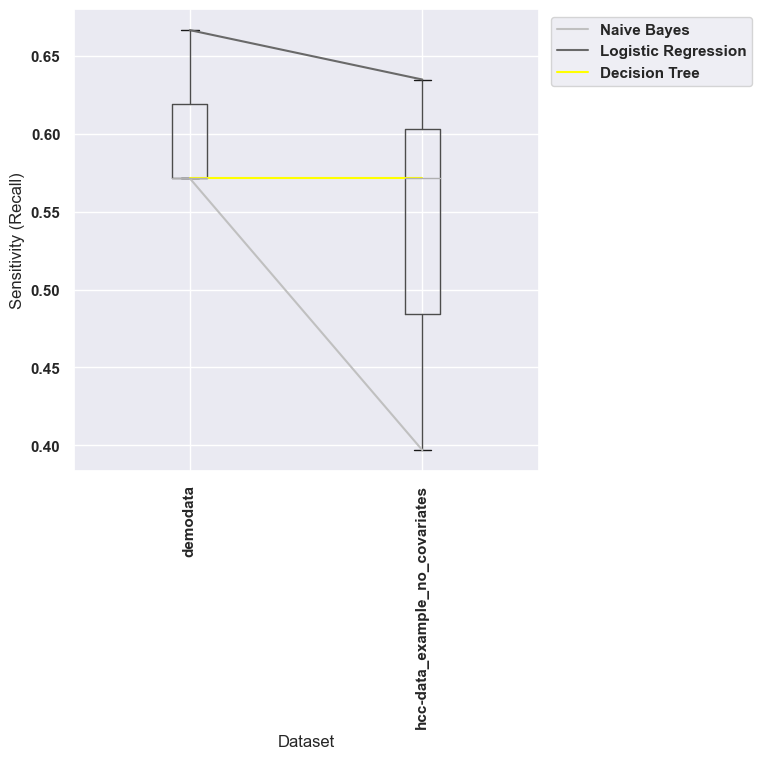

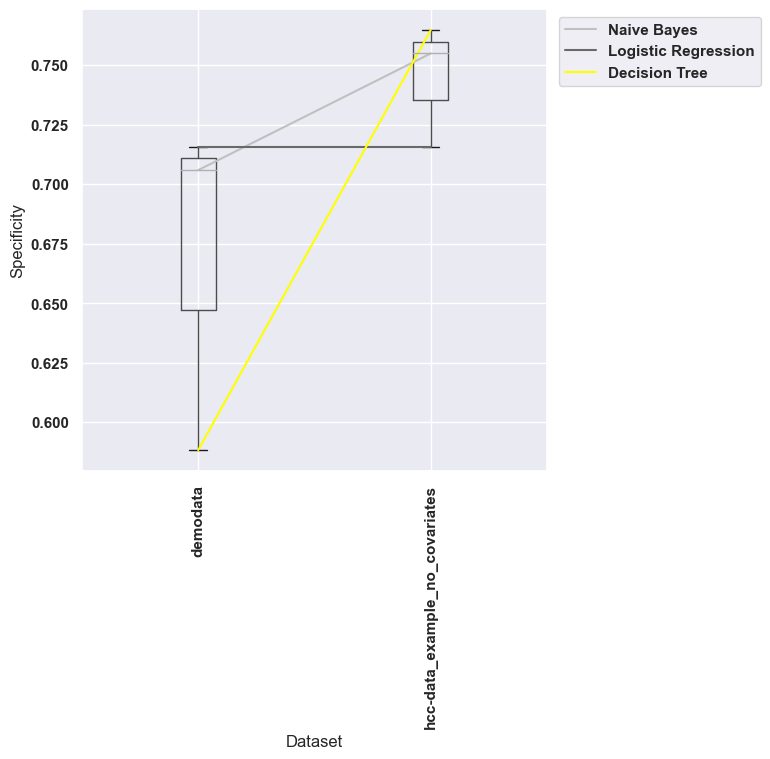

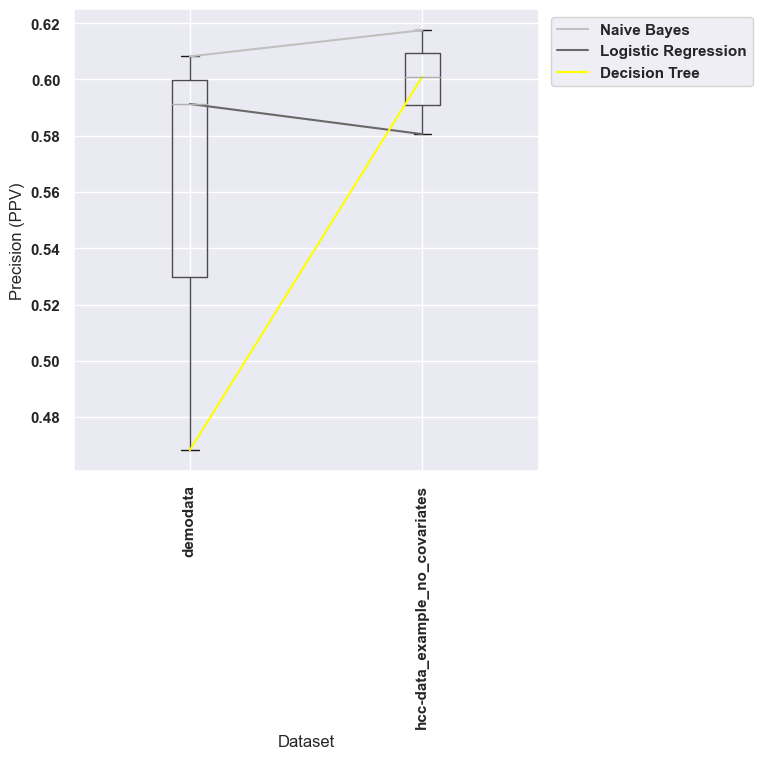

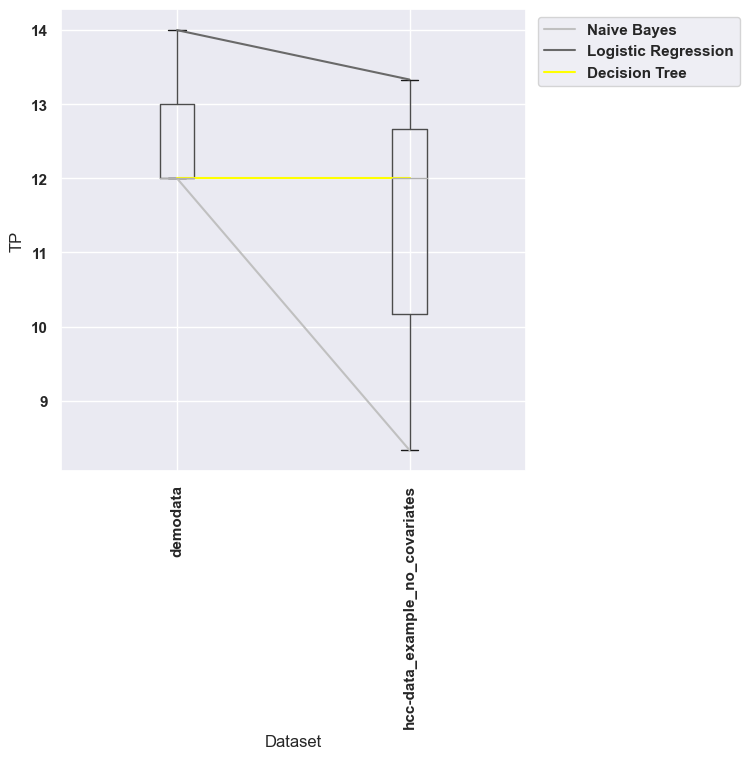

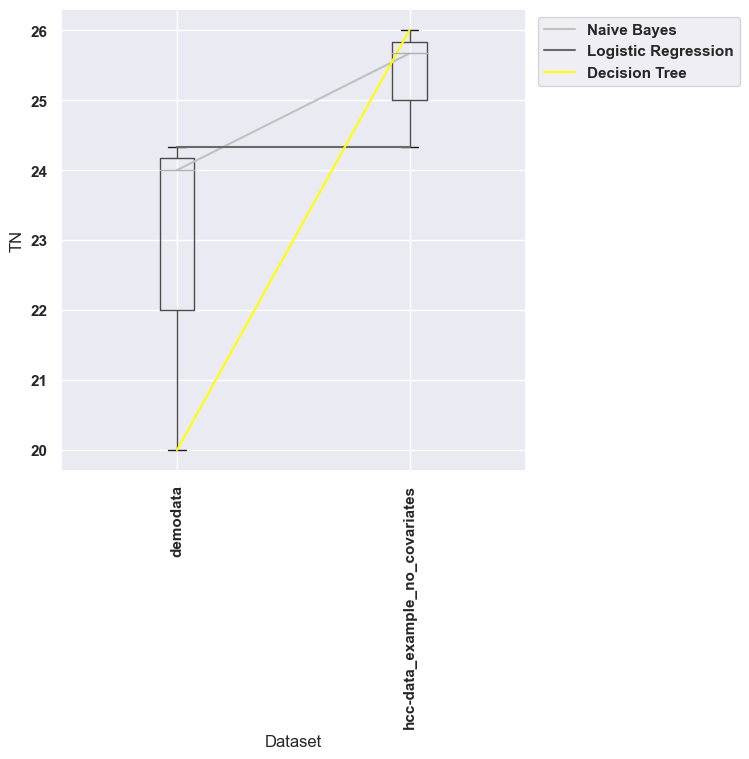

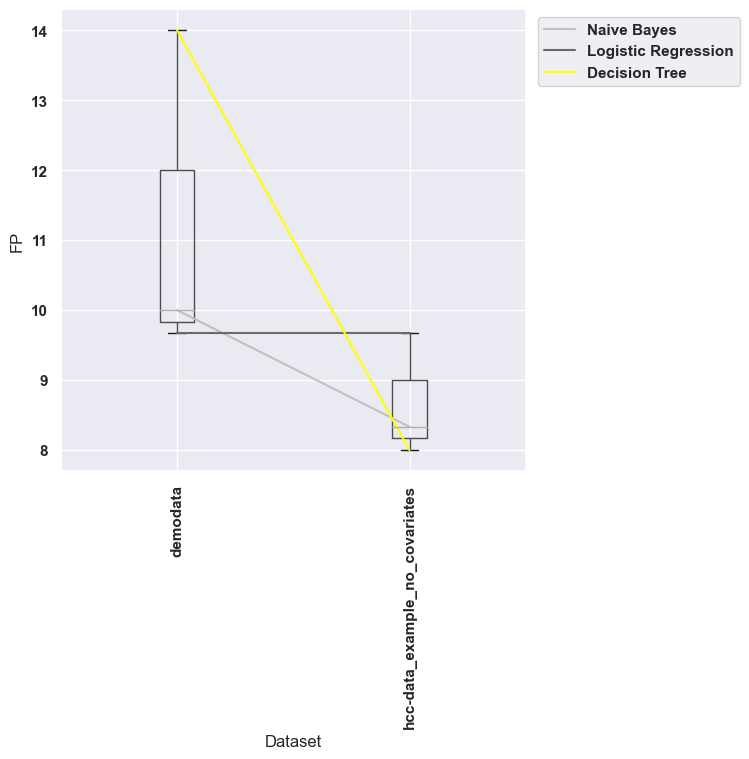

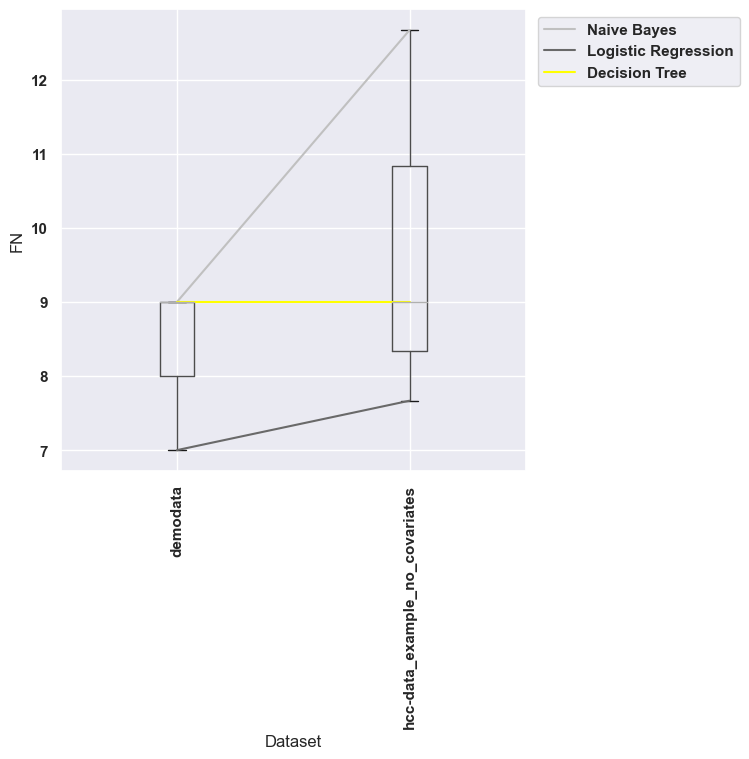

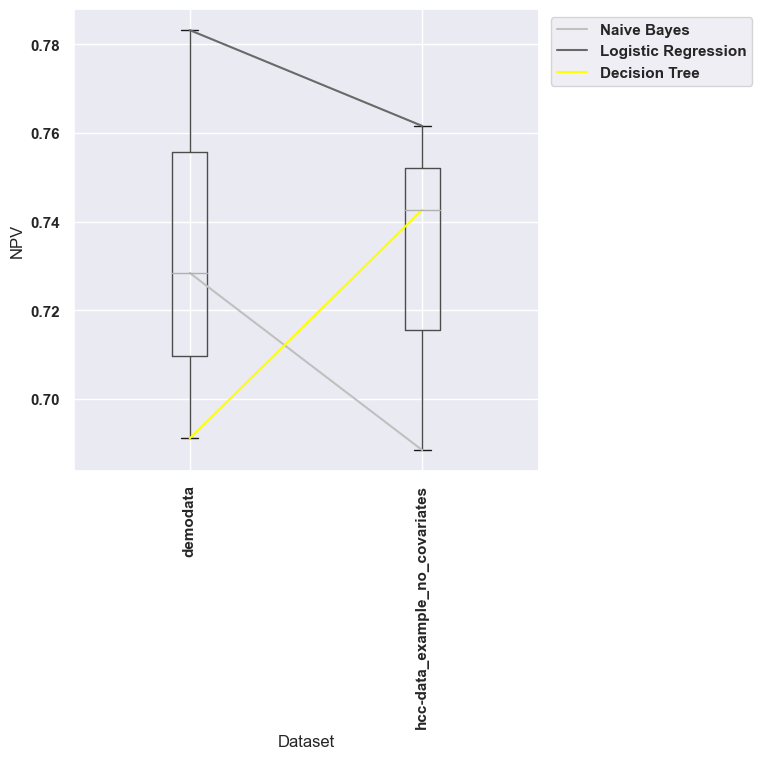

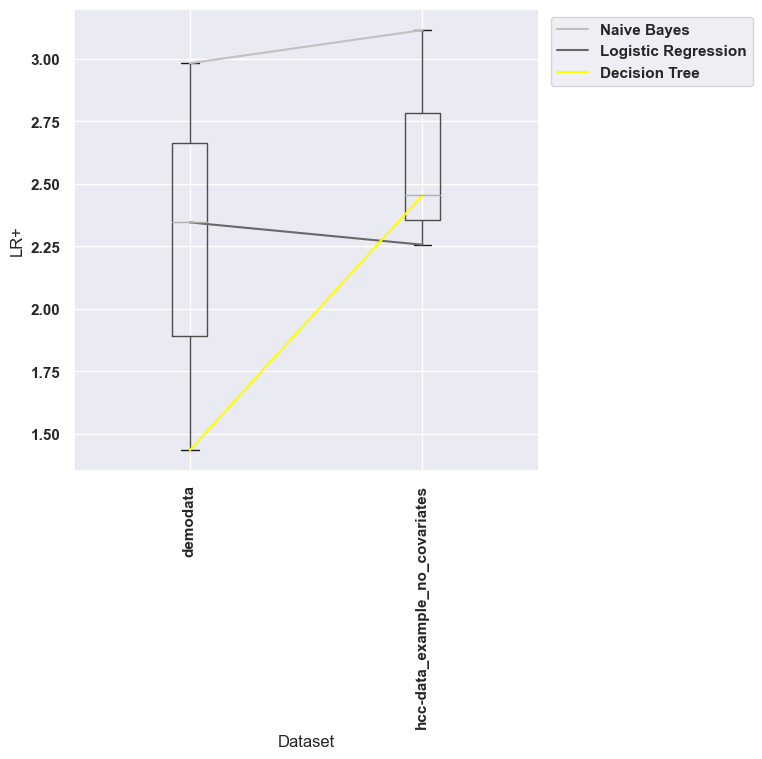

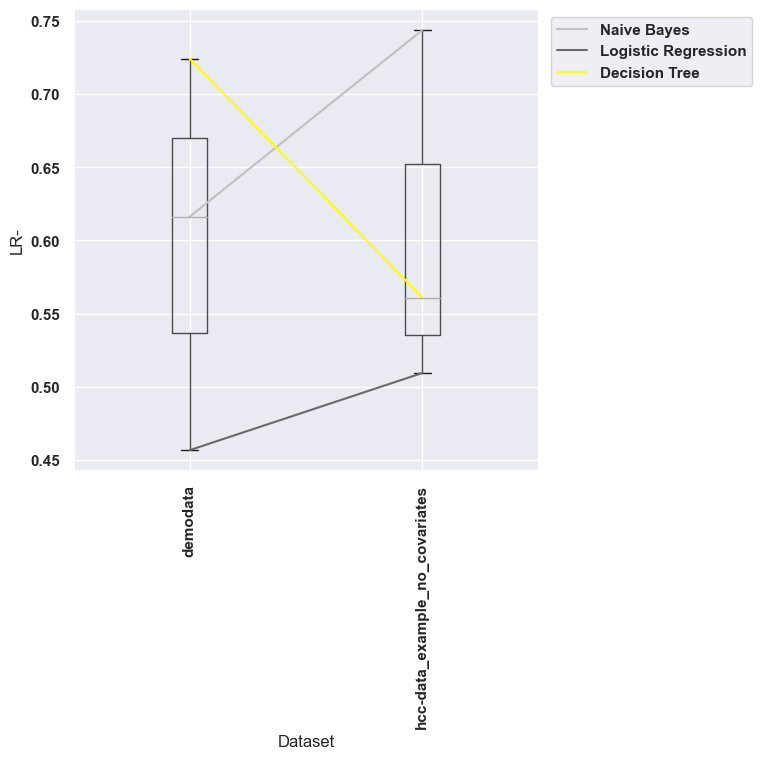

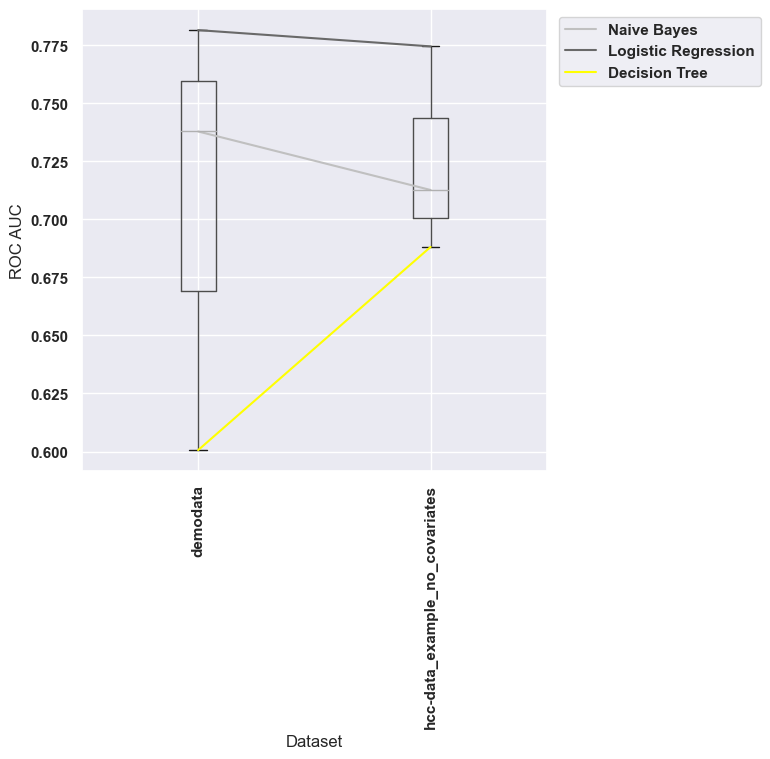

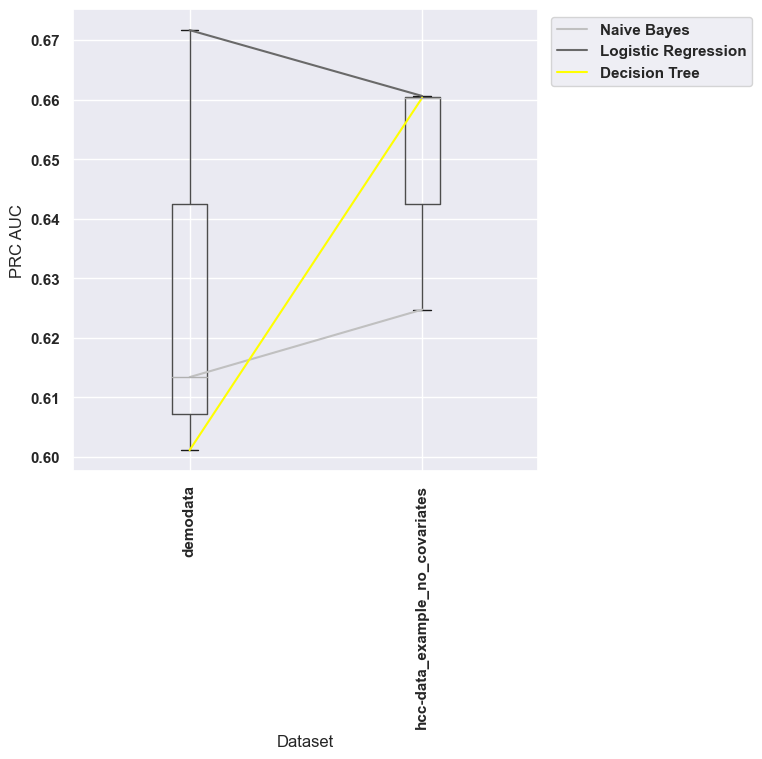

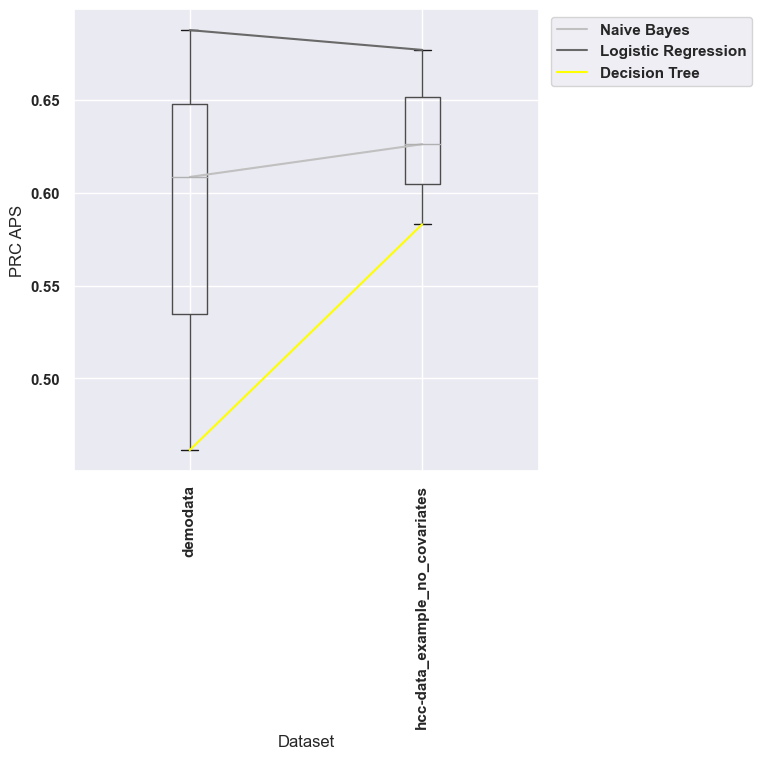

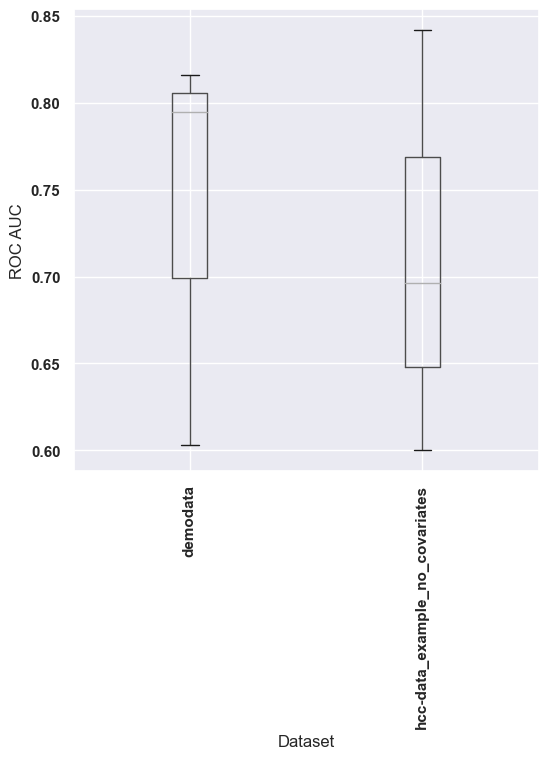

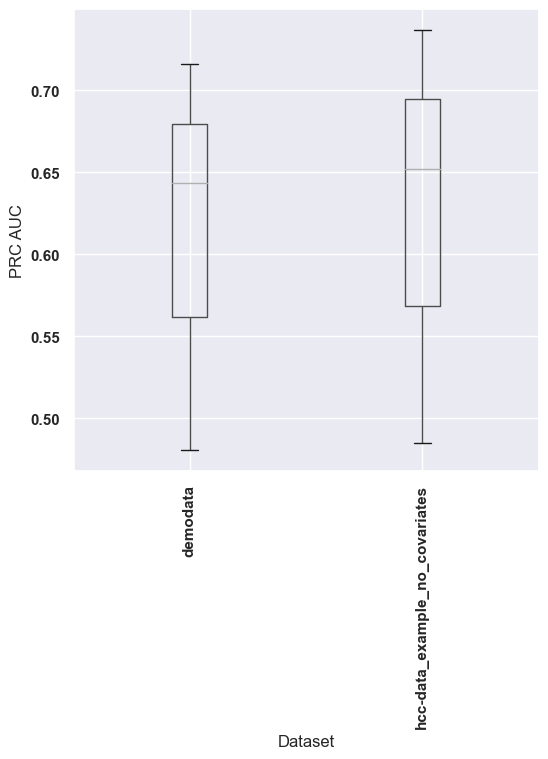

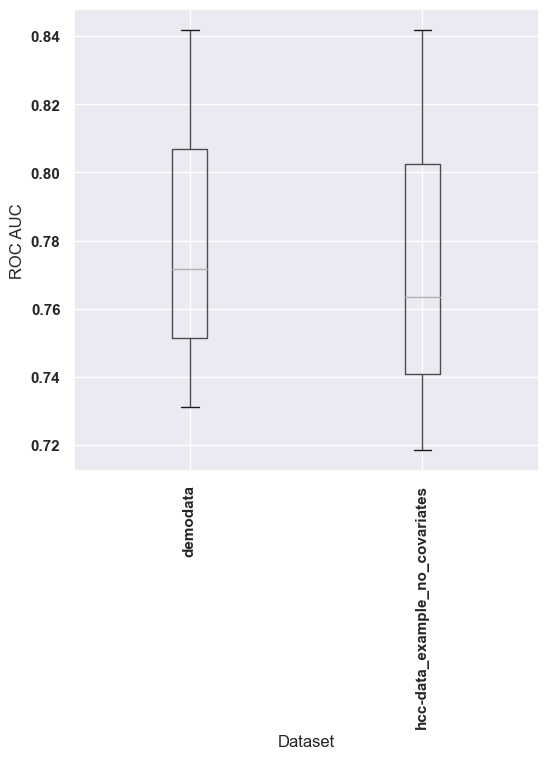

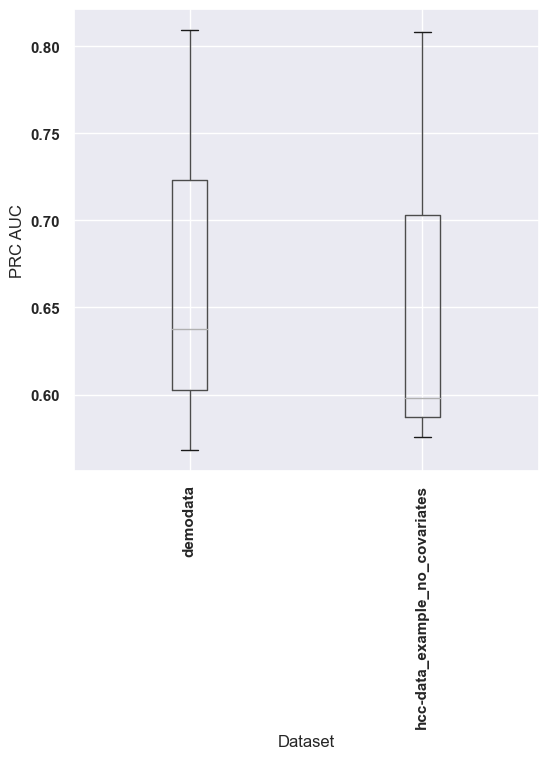

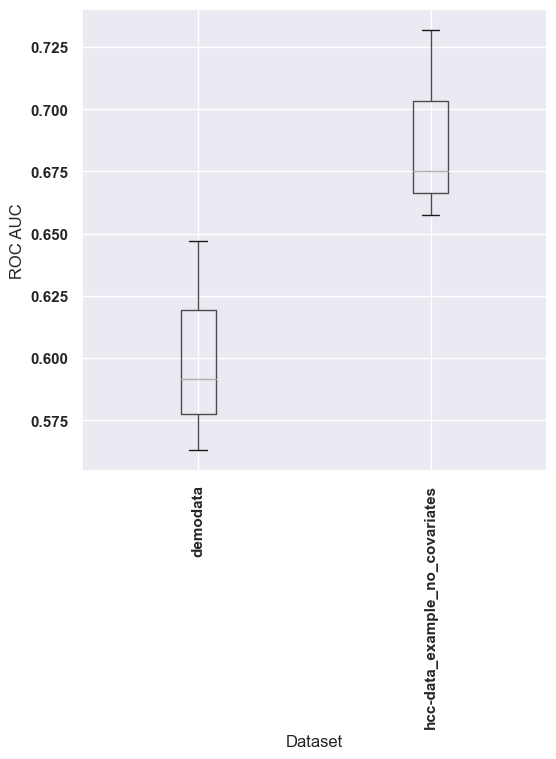

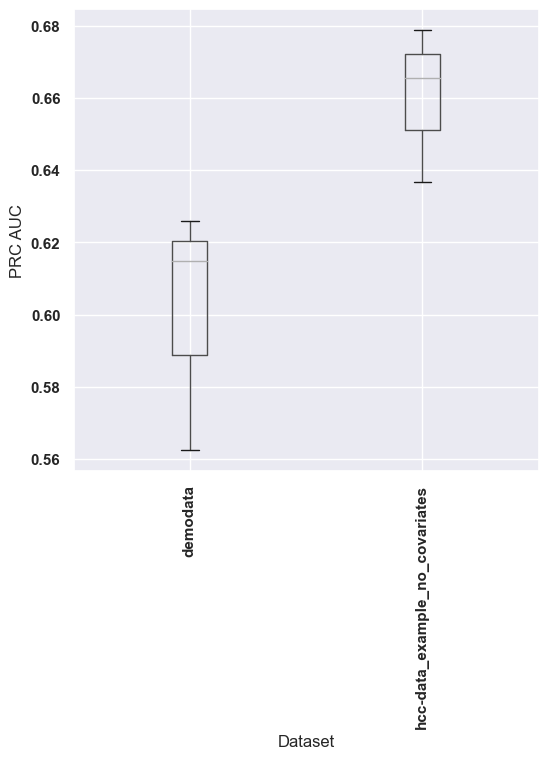

INFO: Phase 7 complete


In [17]:
from streamline.runners.compare_runner import CompareRunner
if len_datasets(output_path, experiment_name):
    cmp = CompareRunner(output_path, experiment_name, algorithms=algorithms,
                        class_label=class_label, instance_label=instance_label,
                        show_plots=True)
    cmp.run(run_parallel=False)

## Phase 8: PDF Training Report Generator (Optional)
Download a PDF report of the analysis

In [18]:
from streamline.runners.report_runner import ReportRunner
rep = ReportRunner(output_path, experiment_name, 
                   algorithms=algorithms)
rep.run(run_parallel=False)

INFO: Starting Report
INFO: Publishing Univariate Analysis
INFO: Publishing Model Prediction Summary
INFO: Publishing Average Model Prediction Statistics
INFO: Publishing Median Model Prediction Statistics
INFO: Publishing Feature Importance Summaries
INFO: Publishing Dataset Comparison Boxplots
INFO: Publishing Statistical Analysis
INFO: Publishing Runtime Summary
INFO: Phase 8 complete


## Phase 9: Apply Models to Replication Data (Optional)

In [19]:
wd_path = '.'
rep_data_path = wd_path + '/DemoRepData'
dataset_for_rep = wd_path + '/DemoData/demodata.csv'
dataset_name = dataset_for_rep.split('/')[-1].split('.')[0]

In [20]:
from streamline.runners.replicate_runner import ReplicationRunner
repl = ReplicationRunner(rep_data_path, dataset_for_rep, output_path, experiment_name, load_algo=True)
repl.run(run_parallel=False)

INFO: Loading Dataset: hcc-data_example_rep
INFO: Loading Dataset: demodata
INFO: Data Counts: ----------------
INFO: Instance Count = 165
INFO: Feature Count = 49
INFO:     Categorical  = 27
INFO:     Quantitative = 22
INFO: Missing Count = 826
INFO:     Missing Percent = 0.10216450216450217
INFO: Class Counts: ----------------
INFO: Class Count Information0    102
1     63
Name: Class, dtype: int64
INFO: Running stats on Logistic Regression
INFO: Running stats on Naive Bayes
INFO: Running stats on Decision Tree


hcc-data_example_rep phase 9 complete


## Phase 10: PDF Apply Report Generator (Optional)

In [21]:
from streamline.runners.report_runner import ReportRunner
rep = ReportRunner(output_path=output_path, experiment_name=experiment_name,
                   algorithms=algorithms, training=False, 
                   rep_data_path=rep_data_path, dataset_for_rep=dataset_for_rep)
rep.run(run_parallel=False)

INFO: Starting Report
INFO: Publishing Model Prediction Summary
INFO: Publishing Average Model Prediction Statistics
INFO: Publishing Median Model Prediction Statistics
INFO: Phase 10 complete


## Phase 11: File Cleanup (Optional)

In [22]:
from streamline.runners.clean_runner import CleanRunner
clean = CleanRunner(output_path, experiment_name)
# run_parallel is not used in clean
clean.run()